In [349]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font', family = font)
plt.rc('axes', unicode_minus=False)

In [196]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

### Data Set

In [3]:
# train 

train = pd.read_csv('농산물/235801_2021 농산물 가격예측 AI 경진대회/public_data/train.csv')
train

date   요일  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  무_가격(원/kg)  \
0     2016-01-01  금요일         0.0          0.0        0.0         0.0   
1     2016-01-02  토요일     80860.0        329.0    80272.0       360.0   
2     2016-01-03  일요일         0.0          0.0        0.0         0.0   
3     2016-01-04  월요일   1422742.5        478.0  1699653.7       382.0   
4     2016-01-05  화요일   1167241.0        442.0  1423482.3       422.0   
...          ...  ...         ...          ...        ...         ...   
1728  2020-09-24  목요일   1856965.0       1839.0  2055640.0       990.0   
1729  2020-09-25  금요일   1880095.5       1789.0  1879261.0      1011.0   
1730  2020-09-26  토요일   1661090.9       1760.0  1709385.7      1075.0   
1731  2020-09-27  일요일     25396.0       3066.0    38222.0      1139.0   
1732  2020-09-28  월요일   2405051.9       1867.0  2747519.5      1147.0   

      양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  ...  청상추_거래량(kg)  \
0            0.0          0.0          0.0           0.0  ...          0.0   
1       122787.5       1281.0          3.0       11000.0  ...       5125.0   
2            0.0          0.0          0.0           0.0  ...          0.0   
3      2315079.0       1235.0        699.0        4464.0  ...      38525.5   
4      2092960.1       1213.0       1112.6        4342.0  ...      32615.0   
...          ...          ...          ...           ...  ...          ...   
1728   2281429.2        990.0       2818.4       19101.0  ...      50730.0   
1729   2074513.0        955.0       1887.1       23095.0  ...      54322.0   
1730   2089081.2        961.0        959.0       22510.0  ...      61213.0   
1731     18240.0       1056.0         60.0       22333.0  ...        144.0   
1732   2235784.7        964.0       1630.6       22022.0  ...      84155.0   

      청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  \
0              0.0           0.0            0.0          0.0           0.0   
1           9235.0         434.0         2109.0      19159.0        2414.0   
2              0.0           0.0            0.0          0.0           0.0   
3           7631.0      500702.0         2046.0     620539.0        2018.0   
4           6926.0      147638.0         2268.0     231958.0        2178.0   
...            ...           ...            ...          ...           ...   
1728        4509.0      282212.3         3001.0     313139.7        3426.0   
1729        4178.0      312214.8         2999.0     362741.0        3357.0   
1730        3770.0      327395.8         3065.0     390361.2        3092.0   
1731        4076.0         285.0         3707.0       2464.0        3252.0   
1732        4167.0      554862.6         2873.0     667745.0        2782.0   

      캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0              0.0            0.0            0.0             0.0  
1            880.0         2014.0            0.0             0.0  
2              0.0            0.0            0.0             0.0  
3           2703.8         3885.0            0.0             0.0  
4           8810.0         2853.0            0.0             0.0  
...            ...            ...            ...             ...  
1728      504242.6         3620.0       283196.9         10940.0  
1729      479683.1         3618.0       303779.6         10844.0  
1730      521493.8         3691.0       313295.7         10636.0  
1731       21717.0         3567.0         9734.0         10699.0  
1732      601841.0         3761.0       382263.4         10998.0  

[1733 rows x 44 columns]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1733 non-null   object 
 1   요일              1733 non-null   object 
 2   배추_거래량(kg)      1733 non-null   float64
 3   배추_가격(원/kg)     1733 non-null   float64
 4   무_거래량(kg)       1733 non-null   float64
 5   무_가격(원/kg)      1733 non-null   float64
 6   양파_거래량(kg)      1733 non-null   float64
 7   양파_가격(원/kg)     1733 non-null   float64
 8   건고추_거래량(kg)     1733 non-null   float64
 9   건고추_가격(원/kg)    1733 non-null   float64
 10  마늘_거래량(kg)      1733 non-null   float64
 11  마늘_가격(원/kg)     1733 non-null   float64
 12  대파_거래량(kg)      1733 non-null   float64
 13  대파_가격(원/kg)     1733 non-null   float64
 14  얼갈이배추_거래량(kg)   1733 non-null   float64
 15  얼갈이배추_가격(원/kg)  1733 non-null   float64
 16  양배추_거래량(kg)     1733 non-null   float64
 17  양배추_가격(원/kg)    1733 non-null   f

In [9]:
train.isna().sum()  # null 값 없음

date              0
요일                0
배추_거래량(kg)        0
배추_가격(원/kg)       0
무_거래량(kg)         0
무_가격(원/kg)        0
양파_거래량(kg)        0
양파_가격(원/kg)       0
건고추_거래량(kg)       0
건고추_가격(원/kg)      0
마늘_거래량(kg)        0
마늘_가격(원/kg)       0
대파_거래량(kg)        0
대파_가격(원/kg)       0
얼갈이배추_거래량(kg)     0
얼갈이배추_가격(원/kg)    0
양배추_거래량(kg)       0
양배추_가격(원/kg)      0
깻잎_거래량(kg)        0
깻잎_가격(원/kg)       0
시금치_거래량(kg)       0
시금치_가격(원/kg)      0
미나리_거래량(kg)       0
미나리_가격(원/kg)      0
당근_거래량(kg)        0
당근_가격(원/kg)       0
파프리카_거래량(kg)      0
파프리카_가격(원/kg)     0
새송이_거래량(kg)       0
새송이_가격(원/kg)      0
팽이버섯_거래량(kg)      0
팽이버섯_가격(원/kg)     0
토마토_거래량(kg)       0
토마토_가격(원/kg)      0
청상추_거래량(kg)       0
청상추_가격(원/kg)      0
백다다기_거래량(kg)      0
백다다기_가격(원/kg)     0
애호박_거래량(kg)       0
애호박_가격(원/kg)      0
캠벨얼리_거래량(kg)      0
캠벨얼리_가격(원/kg)     0
샤인마스캇_거래량(kg)     0
샤인마스캇_가격(원/kg)    0
dtype: int64

In [36]:
# column명 변환

rename = []
for i in range(len(train.columns)):
     rename.append(train.columns[i].split('(')[0])
        
rename
train.columns = rename

In [86]:
# date -> 년,월,일 로 변환

time = pd.to_datetime(train.date)
train['year'] = time.dt.year
train['month'] = time.dt.month
train['date'] = time.dt.day
train

date   요일     배추_거래량   배추_가격      무_거래량    무_가격     양파_거래량   양파_가격  \
0        1  금요일        0.0     0.0        0.0     0.0        0.0     0.0   
1        2  토요일    80860.0   329.0    80272.0   360.0   122787.5  1281.0   
2        3  일요일        0.0     0.0        0.0     0.0        0.0     0.0   
3        4  월요일  1422742.5   478.0  1699653.7   382.0  2315079.0  1235.0   
4        5  화요일  1167241.0   442.0  1423482.3   422.0  2092960.1  1213.0   
...    ...  ...        ...     ...        ...     ...        ...     ...   
1728    24  목요일  1856965.0  1839.0  2055640.0   990.0  2281429.2   990.0   
1729    25  금요일  1880095.5  1789.0  1879261.0  1011.0  2074513.0   955.0   
1730    26  토요일  1661090.9  1760.0  1709385.7  1075.0  2089081.2   961.0   
1731    27  일요일    25396.0  3066.0    38222.0  1139.0    18240.0  1056.0   
1732    28  월요일  2405051.9  1867.0  2747519.5  1147.0  2235784.7   964.0   

      건고추_거래량   건고추_가격  ...  백다다기_거래량  백다다기_가격   애호박_거래량  애호박_가격  캠벨얼리_거래량  \
0         0.0      0.0  ...       0.0      0.0       0.0     0.0       0.0   
1         3.0  11000.0  ...     434.0   2109.0   19159.0  2414.0     880.0   
2         0.0      0.0  ...       0.0      0.0       0.0     0.0       0.0   
3       699.0   4464.0  ...  500702.0   2046.0  620539.0  2018.0    2703.8   
4      1112.6   4342.0  ...  147638.0   2268.0  231958.0  2178.0    8810.0   
...       ...      ...  ...       ...      ...       ...     ...       ...   
1728   2818.4  19101.0  ...  282212.3   3001.0  313139.7  3426.0  504242.6   
1729   1887.1  23095.0  ...  312214.8   2999.0  362741.0  3357.0  479683.1   
1730    959.0  22510.0  ...  327395.8   3065.0  390361.2  3092.0  521493.8   
1731     60.0  22333.0  ...     285.0   3707.0    2464.0  3252.0   21717.0   
1732   1630.6  22022.0  ...  554862.6   2873.0  667745.0  2782.0  601841.0   

      캠벨얼리_가격  샤인마스캇_거래량  샤인마스캇_가격  year  month  
0         0.0        0.0       0.0  2016      1  
1      2014.0        0.0       0.0  2016      1  
2         0.0        0.0       0.0  2016      1  
3      3885.0        0.0       0.0  2016      1  
4      2853.0        0.0       0.0  2016      1  
...       ...        ...       ...   ...    ...  
1728   3620.0   283196.9   10940.0  2020      9  
1729   3618.0   303779.6   10844.0  2020      9  
1730   3691.0   313295.7   10636.0  2020      9  
1731   3567.0     9734.0   10699.0  2020      9  
1732   3761.0   382263.4   10998.0  2020      9  

[1733 rows x 46 columns]

In [144]:
train = train[['year','month','date','요일', '배추_거래량', '배추_가격', '무_거래량', '무_가격', '양파_거래량', '양파_가격',
       '건고추_거래량', '건고추_가격', '마늘_거래량', '마늘_가격', '대파_거래량', '대파_가격', '얼갈이배추_거래량',
       '얼갈이배추_가격', '양배추_거래량', '양배추_가격', '깻잎_거래량', '깻잎_가격', '시금치_거래량', '시금치_가격',
       '미나리_거래량', '미나리_가격', '당근_거래량', '당근_가격', '파프리카_거래량', '파프리카_가격',
       '새송이_거래량', '새송이_가격', '팽이버섯_거래량', '팽이버섯_가격', '토마토_거래량', '토마토_가격',
       '청상추_거래량', '청상추_가격', '백다다기_거래량', '백다다기_가격', '애호박_거래량', '애호박_가격',
       '캠벨얼리_거래량', '캠벨얼리_가격', '샤인마스캇_거래량', '샤인마스캇_가격']]

### 배추

In [88]:
# 배추
a = train[['year','month','date','요일','배추_거래량','배추_가격']]
a

year  month  date   요일     배추_거래량   배추_가격
0     2016      1     1  금요일        0.0     0.0
1     2016      1     2  토요일    80860.0   329.0
2     2016      1     3  일요일        0.0     0.0
3     2016      1     4  월요일  1422742.5   478.0
4     2016      1     5  화요일  1167241.0   442.0
...    ...    ...   ...  ...        ...     ...
1728  2020      9    24  목요일  1856965.0  1839.0
1729  2020      9    25  금요일  1880095.5  1789.0
1730  2020      9    26  토요일  1661090.9  1760.0
1731  2020      9    27  일요일    25396.0  3066.0
1732  2020      9    28  월요일  2405051.9  1867.0

[1733 rows x 6 columns]

In [55]:
a[ (a.배추_거래량 == 0.0 ) & ( a.배추_가격 == 0.0)].요일.value_counts()

일요일    229
금요일      5
월요일      5
화요일      4
토요일      4
수요일      4
목요일      2
Name: 요일, dtype: int64

In [114]:
# 총 판매량 컬럼 추가

a['배추_총가격'] = a.배추_거래량 * a.배추_가격
a

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


year  month  date   요일     배추_거래량   배추_가격        배추_총가격
0     2016      1     1  금요일        0.0     0.0  0.000000e+00
1     2016      1     2  토요일    80860.0   329.0  2.660294e+07
2     2016      1     3  일요일        0.0     0.0  0.000000e+00
3     2016      1     4  월요일  1422742.5   478.0  6.800709e+08
4     2016      1     5  화요일  1167241.0   442.0  5.159205e+08
...    ...    ...   ...  ...        ...     ...           ...
1728  2020      9    24  목요일  1856965.0  1839.0  3.414959e+09
1729  2020      9    25  금요일  1880095.5  1789.0  3.363491e+09
1730  2020      9    26  토요일  1661090.9  1760.0  2.923520e+09
1731  2020      9    27  일요일    25396.0  3066.0  7.786414e+07
1732  2020      9    28  월요일  2405051.9  1867.0  4.490232e+09

[1733 rows x 7 columns]

#### 년도별 평균

In [115]:
# 년도별로 평균

cbg = a.groupby('year')[['배추_거래량','배추_가격','배추_총가격']].mean().reset_index()
cbg

year        배추_거래량       배추_가격        배추_총가격
0  2016  1.205724e+06  704.879781  9.474682e+08
1  2017  1.223984e+06  539.679452  7.325398e+08
2  2018  1.185104e+06  511.528767  6.582707e+08
3  2019  1.077009e+06  477.671233  6.568479e+08
4  2020  7.909842e+05  804.349265  7.633471e+08

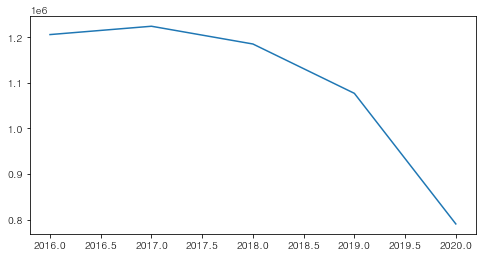

In [109]:
plt.figure(figsize = (8,4))
plt.plot(cbg['year'], cbg['배추_거래량'])

> 2020년은 9월까지 밖에 없음 

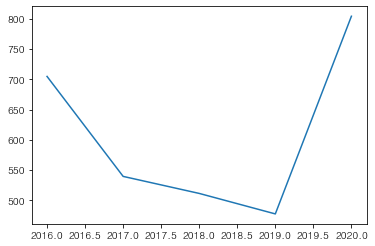

In [110]:
plt.plot(cbg['year'], cbg['배추_가격'])

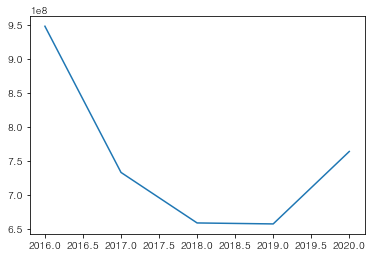

In [116]:
plt.plot(cbg['year'], cbg['배추_총가격'])

#### 월별 평균

In [124]:
cbg_m = a.groupby('month')[['배추_거래량','배추_가격','배추_총가격']].mean().reset_index()

Text(0.5, 1.0, '배추 월별 평균 거래량')

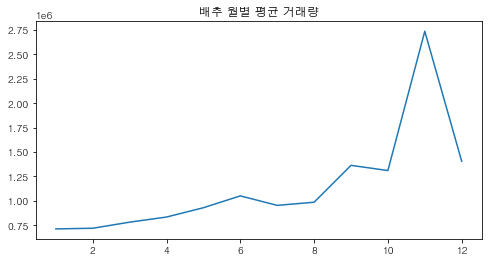

In [128]:
plt.figure(figsize = (8,4))
plt.plot(cbg_m['month'], cbg_m['배추_거래량'])
plt.title('배추 월별 평균 거래량')

Text(0.5, 1.0, '배추 월별 평균 가격')

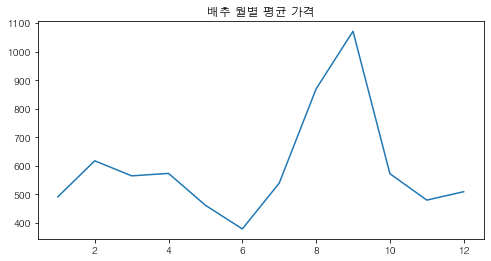

In [129]:
plt.figure(figsize = (8,4))
plt.plot(cbg_m['month'], cbg_m['배추_가격'])
plt.title('배추 월별 평균 가격')

Text(0.5, 1.0, '배추 월별 평균 총가격')

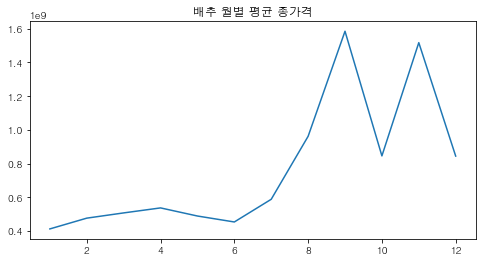

In [130]:
plt.figure(figsize = (8,4))
plt.plot(cbg_m['month'], cbg_m['배추_총가격'])
plt.title('배추 월별 평균 총가격')

#### 요일별 평균

In [135]:
cbg_d= a.groupby('요일')[['배추_거래량','배추_가격','배추_총가격']].mean().reset_index()
cbg_d = cbg_d.reindex(index = [3 ,6,2,1,0,5,4])
cbg_d

요일        배추_거래량       배추_가격        배추_총가격
3  월요일  1.554184e+06  683.439516  1.066818e+09
6  화요일  1.349449e+06  672.599190  8.951193e+08
2  수요일  1.311055e+06  686.668016  8.764671e+08
1  목요일  1.296214e+06  671.242915  8.651060e+08
0  금요일  1.308000e+06  668.185484  8.812416e+08
5  토요일  9.722325e+05  699.120968  6.719914e+08
4  일요일  2.511479e+03   99.552419  3.078233e+06

Text(0.5, 1.0, '배추 요일별 평균 거래량')

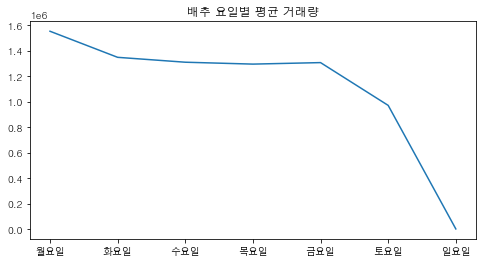

In [136]:
plt.figure(figsize = (8,4))
plt.plot(cbg_d['요일'], cbg_d['배추_거래량'])
plt.title('배추 요일별 평균 거래량')

Text(0.5, 1.0, '배추 요일별 평균 가격')

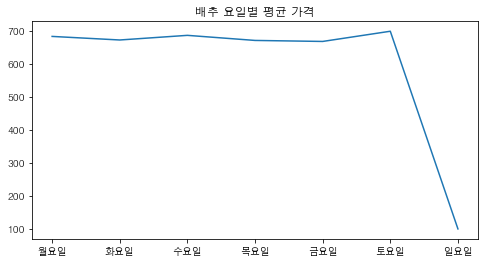

In [137]:
plt.figure(figsize = (8,4))
plt.plot(cbg_d['요일'], cbg_d['배추_가격'])
plt.title('배추 요일별 평균 가격')

Text(0.5, 1.0, '배추 요일별 평균 총가격')

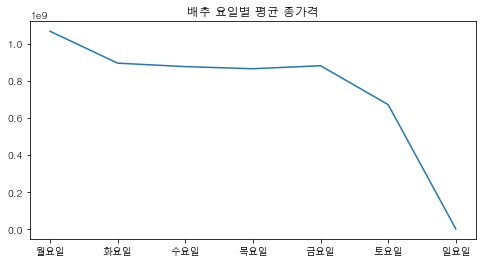

In [138]:
plt.figure(figsize = (8,4))
plt.plot(cbg_d['요일'], cbg_d['배추_총가격'])
plt.title('배추 요일별 평균 총가격')

### 거래량 가격  

#### 거래량 

##### 거래가 이루어지지 않은 날 

In [248]:
train_amt[train_amt['무_거래량']==0]  # 무 거래량이 0 이여도 다른 품목/품종에서 0 이 아닐때가 있음

year  month  date   요일  배추_거래량  무_거래량    양파_거래량  건고추_거래량  마늘_거래량  \
0     2016      1     1  금요일     0.0    0.0       0.0      0.0     0.0   
2     2016      1     3  일요일     0.0    0.0       0.0      0.0     0.0   
9     2016      1    10  일요일     0.0    0.0       0.0      0.0     0.0   
16    2016      1    17  일요일     0.0    0.0       0.0      0.0     0.0   
23    2016      1    24  일요일     0.0    0.0       0.0      0.0     0.0   
38    2016      2     8  월요일     0.0    0.0       0.0      0.0     0.0   
39    2016      2     9  화요일     0.0    0.0       0.0      0.0     0.0   
40    2016      2    10  수요일    32.0    0.0     500.0      0.0   900.0   
44    2016      2    14  일요일     0.0    0.0       0.0      0.0     0.0   
51    2016      2    21  일요일     0.0    0.0       0.0      0.0     0.0   
58    2016      2    28  일요일     0.0    0.0       0.0      0.0     0.0   
65    2016      3     6  일요일     0.0    0.0       0.0      0.0     0.0   
72    2016      3    13  일요일     0.0    0.0       0.0      0.0     0.0   
79    2016      3    20  일요일     0.0    0.0       0.0      0.0     0.0   
86    2016      3    27  일요일     0.0    0.0       0.0      0.0     0.0   
93    2016      4     3  일요일     0.0    0.0       0.0      0.0     0.0   
100   2016      4    10  일요일     0.0    0.0       0.0      0.0     0.0   
107   2016      4    17  일요일     0.0    0.0       0.0      0.0     0.0   
114   2016      4    24  일요일     0.0    0.0       0.0      0.0     0.0   
121   2016      5     1  일요일     0.0    0.0       0.0      0.0     0.0   
128   2016      5     8  일요일     0.0    0.0       0.0      0.0     0.0   
135   2016      5    15  일요일     0.0    0.0       0.0      0.0     0.0   
142   2016      5    22  일요일     0.0    0.0       0.0      0.0     0.0   
149   2016      5    29  일요일     0.0    0.0       0.0      0.0     0.0   
156   2016      6     5  일요일     0.0    0.0       0.0      0.0     0.0   
163   2016      6    12  일요일     0.0    0.0       0.0      0.0     0.0   
170   2016      6    19  일요일     0.0    0.0       0.0      0.0     0.0   
177   2016      6    26  일요일     0.0    0.0       0.0      0.0     0.0   
184   2016      7     3  일요일     0.0    0.0       0.0      0.0     0.0   
191   2016      7    10  일요일     0.0    0.0       0.0      0.0     0.0   
198   2016      7    17  일요일     0.0    0.0       0.0      0.0     0.0   
205   2016      7    24  일요일     0.0    0.0       0.0      0.0     0.0   
212   2016      7    31  일요일     0.0    0.0       0.0      0.0     0.0   
219   2016      8     7  일요일     0.0    0.0       0.0      0.0     0.0   
226   2016      8    14  일요일     0.0    0.0       0.0      0.0     0.0   
233   2016      8    21  일요일     0.0    0.0       0.0      0.0     0.0   
240   2016      8    28  일요일     0.0    0.0       0.0      0.0     0.0   
247   2016      9     4  일요일     0.0    0.0       0.0      0.0     0.0   
258   2016      9    15  목요일     0.0    0.0       0.0      0.0     0.0   
259   2016      9    16  금요일     0.0    0.0       0.0      0.0     0.0   
261   2016      9    18  일요일     0.0    0.0       0.0      0.0     0.0   
268   2016      9    25  일요일     0.0    0.0       0.0      0.0     0.0   
275   2016     10     2  일요일     0.0    0.0       0.0      0.0     0.0   
282   2016     10     9  일요일     0.0    0.0       0.0      0.0     0.0   
289   2016     10    16  일요일     0.0    0.0       0.0      0.0     0.0   
296   2016     10    23  일요일     0.0    0.0       0.0      0.0     0.0   
303   2016     10    30  일요일     0.0    0.0       0.0      0.0     0.0   
310   2016     11     6  일요일     0.0    0.0       0.0      0.0     0.0   
317   2016     11    13  일요일     0.0    0.0       0.0      0.0     0.0   
324   2016     11    20  일요일     0.0    0.0       0.0      0.0     0.0   
331   2016     11    27  일요일     0.0    0.0       0.0      0.0     0.0   
338   2016     12     4  일요일     0.0    0.0       0.0      0.0     0.0   
345   2016     12    11  일요일     0.0    0.0       0.0      0.0     0.0   
352   2016

In [252]:
train_amt.요일.value_counts()

금요일    248
토요일    248
일요일    248
월요일    248
화요일    247
수요일    247
목요일    247
Name: 요일, dtype: int64

In [251]:
train_amt['품목총거래량'] = train_amt.iloc[:,4:].sum(axis =1)
train_amt[['year','month','date','요일','품목총거래량']][train_amt.품목총거래량 == 0].요일.value_counts()

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


일요일    226
금요일      4
월요일      4
화요일      4
토요일      4
수요일      3
목요일      2
Name: 요일, dtype: int64

- 대부분의 일요일엔 거래가 이루어지지 않음
- 다른 평일에 거래가 이루어지지 않은건 뭐지? 상점 마다 휴일이 달라서? 공휴일? 몰라

In [156]:
train_amt = train.iloc[:,[0,1,2,3,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44]]
train_amt

year  month  date   요일     배추_거래량      무_거래량     양파_거래량  건고추_거래량  \
0     2016      1     1  금요일        0.0        0.0        0.0      0.0   
1     2016      1     2  토요일    80860.0    80272.0   122787.5      3.0   
2     2016      1     3  일요일        0.0        0.0        0.0      0.0   
3     2016      1     4  월요일  1422742.5  1699653.7  2315079.0    699.0   
4     2016      1     5  화요일  1167241.0  1423482.3  2092960.1   1112.6   
...    ...    ...   ...  ...        ...        ...        ...      ...   
1728  2020      9    24  목요일  1856965.0  2055640.0  2281429.2   2818.4   
1729  2020      9    25  금요일  1880095.5  1879261.0  2074513.0   1887.1   
1730  2020      9    26  토요일  1661090.9  1709385.7  2089081.2    959.0   
1731  2020      9    27  일요일    25396.0    38222.0    18240.0     60.0   
1732  2020      9    28  월요일  2405051.9  2747519.5  2235784.7   1630.6   

        마늘_거래량    대파_거래량  ...    당근_거래량  파프리카_거래량   새송이_거래량  팽이버섯_거래량  \
0          0.0       0.0  ...       0.0       0.0       0.0       0.0   
1      15019.0   92334.0  ...   13885.0    3853.0   15797.0   14634.0   
2          0.0       0.0  ...       0.0       0.0       0.0       0.0   
3     141638.0  994328.1  ...  558950.2  104930.3  277326.5  159800.0   
4     126207.8  787716.0  ...  444353.7  100699.5  218465.2  153084.0   
...        ...       ...  ...       ...       ...       ...       ...   
1728  134359.9  770271.0  ...  423233.2   94152.5  200810.1  129997.7   
1729  126926.0  781384.8  ...  400527.2   87127.3  222932.0  130379.3   
1730  110357.7  810812.8  ...  187076.2  102672.0  249009.1  130047.4   
1731     620.0   18291.4  ...      60.0       0.0    4766.0    2500.0   
1732  175584.1  972402.9  ...  422012.6  183983.8  315101.7  166041.5   

       토마토_거래량  청상추_거래량  백다다기_거래량   애호박_거래량  캠벨얼리_거래량  샤인마스캇_거래량  
0          0.0      0.0       0.0       0.0       0.0        0.0  
1      30950.0   5125.0     434.0   19159.0     880.0        0.0  
2          0.0      0.0       0.0       0.0       0.0        0.0  
3     291057.0  38525.5  500702.0  620539.0    2703.8        0.0  
4     194626.5  32615.0  147638.0  231958.0    8810.0        0.0  
...        ...      ...       ...       ...       ...        ...  
1728  142487.0  50730.0  282212.3  313139.7  504242.6   283196.9  
1729  152575.5  54322.0  312214.8  362741.0  479683.1   303779.6  
1730  176807.0  61213.0  327395.8  390361.2  521493.8   313295.7  
1731     910.0    144.0     285.0    2464.0   21717.0     9734.0  
1732  285116.5  84155.0  554862.6  667745.0  601841.0   382263.4  

[1733 rows x 25 columns]

##### 년도별 거래량 

In [167]:
amt_yr = train_amt.groupby(train_amt['year']).mean().reset_index()
amt_yr = amt_yr.drop(['month','date'], axis = 1)
amt_yr

year        배추_거래량         무_거래량        양파_거래량      건고추_거래량         마늘_거래량  \
0  2016  1.205724e+06  1.271243e+06  1.584287e+06  2147.870765  117782.440164   
1  2017  1.223984e+06  1.346107e+06  1.540144e+06  8497.625205  137849.495616   
2  2018  1.185104e+06  1.303622e+06  1.727455e+06  3976.887945  128288.591507   
3  2019  1.077009e+06  1.256590e+06  1.758195e+06  1488.284658  154779.705479   
4  2020  7.909842e+05  1.166753e+06  1.678942e+06  1173.053676  158122.794118   

          대파_거래량      얼갈이배추_거래량        양배추_거래량        깻잎_거래량  ...  \
0  530295.121858  242450.918033  559338.116120  80549.295902  ...   
1  559513.075616  248009.567123  608193.693425  84516.325479  ...   
2  586009.712603  263407.586301  581191.830685  78987.832877  ...   
3  598544.652877  263459.507945  543522.993699  79279.979726  ...   
4  580991.936765  267107.701103  506585.945956  76742.756618  ...   

          당근_거래량       파프리카_거래량        새송이_거래량       팽이버섯_거래량        토마토_거래량  \
0  258391.118033  113280.211202  138539.214754  107917.628415  328562.533060   
1  283306.205753  119784.679178  139562.817808  108985.497260  325226.932877   
2  271721.940274  110625.073425  145803.287397  102353.758082  318271.336438   
3  287902.550685  122237.718356  148133.144384   99253.944384  311001.421918   
4  274153.584191  117078.102574  151557.434191  101708.128676  310105.976471   

        청상추_거래량       백다다기_거래량        애호박_거래량       캠벨얼리_거래량     샤인마스캇_거래량  
0  30738.647268  402751.059290  292950.061202  151953.232514    396.363388  
1  33991.783836  404445.600000  316716.978630  128875.319178   1122.328767  
2  34361.027945  418708.626301  291101.655890  100920.615616   3398.090411  
3  36039.419726  428764.949589  321053.527671  111851.179726  11045.872329  
4  39677.893750  475935.537868  286598.452206   91156.276471  21203.712132  

[5 rows x 22 columns]

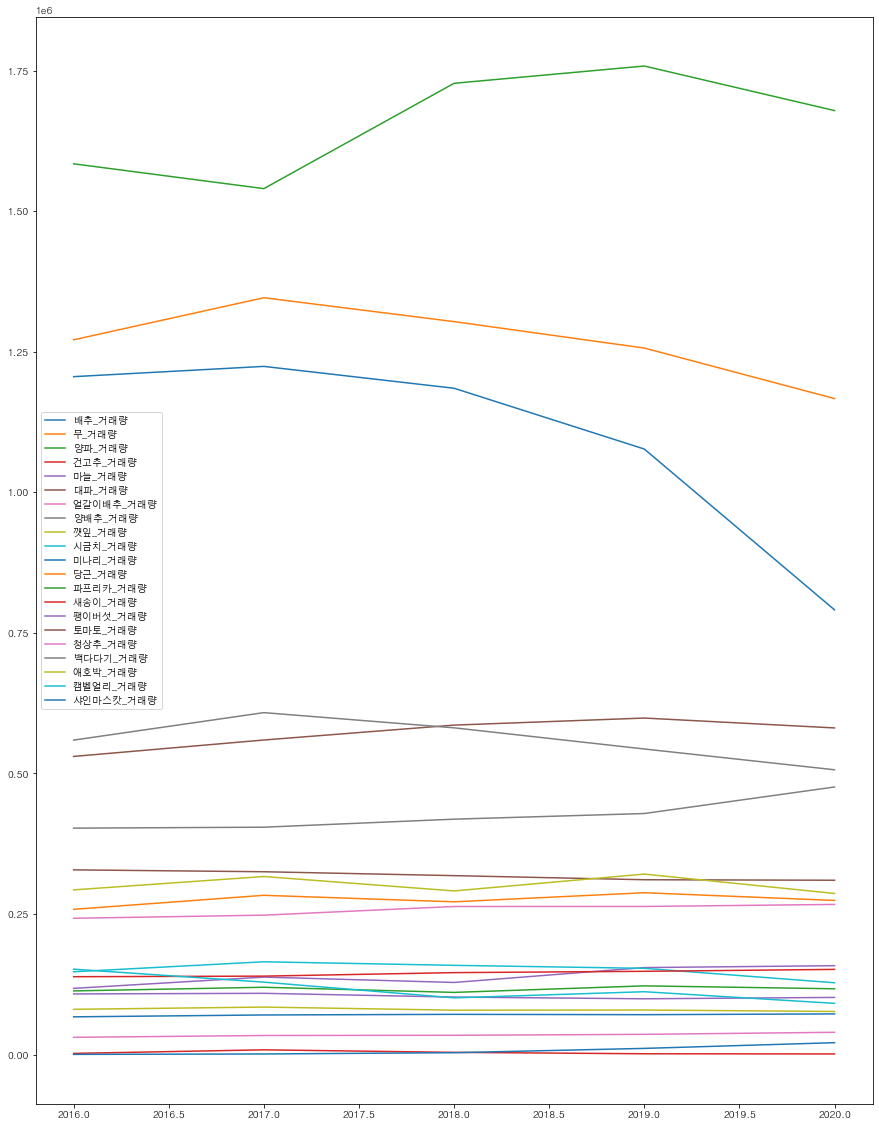

In [295]:
plt.figure(figsize = (15,20))

for i in  range(len(amt_yr.columns)-1):
    plt.plot(amt_yr['year'], amt_yr.iloc[:,[i+1]] , label = amt_yr.columns[i+1])
    plt.legend()

> 양파,무,배추 거래량이 많다.

In [197]:
amt_yr.describe()

year        배추_거래량         무_거래량        양파_거래량      건고추_거래량  \
count     5.000000  5.000000e+00  5.000000e+00  5.000000e+00     5.000000   
mean   2018.000000  1.096561e+06  1.268863e+06  1.657804e+06  3456.744450   
std       1.581139  1.801058e+05  6.662893e+04  9.303897e+04  3020.109927   
min    2016.000000  7.909842e+05  1.166753e+06  1.540144e+06  1173.053676   
25%    2017.000000  1.077009e+06  1.256590e+06  1.584287e+06  1488.284658   
50%    2018.000000  1.185104e+06  1.271243e+06  1.678942e+06  2147.870765   
75%    2019.000000  1.205724e+06  1.303622e+06  1.727455e+06  3976.887945   
max    2020.000000  1.223984e+06  1.346107e+06  1.758195e+06  8497.625205   

              마늘_거래량         대파_거래량      얼갈이배추_거래량        양배추_거래량  \
count       5.000000       5.000000       5.000000       5.000000   
mean   139364.605377  571070.899944  256887.056101  559766.515977   
std     17177.444892   26798.552093   10924.604277   38394.153839   
min    117782.440164  530295.121858  242450.918033  506585.945956   
25%    128288.591507  559513.075616  248009.567123  543522.993699   
50%    137849.495616  580991.936765  263407.586301  559338.116120   
75%    154779.705479  586009.712603  263459.507945  581191.830685   
max    158122.794118  598544.652877  267107.701103  608193.693425   

             깻잎_거래량        시금치_거래량       미나리_거래량         당근_거래량  \
count      5.000000       5.000000      5.000000       5.000000   
mean   80015.238120  150473.203638  70531.226352  275095.079787   
std     2865.759356   14293.096007   2001.049773   11431.761925   
min    76742.756618  127756.772059  67178.456011  258391.118033   
25%    78987.832877  147313.561749  70492.668493  271721.940274   
50%    79279.979726  153437.932055  71013.923836  274153.584191   
75%    80549.295902  158774.807945  71591.091507  283306.205753   
max    84516.325479  165082.944384  72379.991912  287902.550685   

            파프리카_거래량        새송이_거래량       팽이버섯_거래량        토마토_거래량  \
count       5.000000       5.000000       5.000000       5.000000   
mean   116601.156947  144719.179707  104043.791364  318633.640153   
std      4713.686730    5576.114318    4203.606709    8263.738415   
min    110625.073425  138539.214754   99253.944384  310105.976471   
25%    113280.211202  139562.817808  101708.128676  311001.421918   
50%    117078.102574  145803.287397  102353.758082  318271.336438   
75%    119784.679178  148133.144384  107917.628415  325226.932877   
max    122237.718356  151557.434191  108985.497260  328562.533060   

            청상추_거래량       백다다기_거래량        애호박_거래량       캠벨얼리_거래량     샤인마스캇_거래량  
count      5.000000       5.000000       5.000000       5.000000      5.000000  
mean   34961.754505  426121.154610  301684.135120  116951.324701   7433.273405  
std     3261.122581   29830.349604   15945.300990   24060.833426   8779.303508  
min    30738.647268  402751.059290  286598.452206   91156.276471    396.363388  
25%    33991.783836  404445.600000  291101.655890  100920.615616   1122.328767  
50%    34361.027945  418708.626301  292950.061202  111851.179726   3398.090411  
75%    36039.419726  428764.949589  316716.978630  128875.319178  11045.872329  
max    39677.893750  475935.537868  321053.527671  151953.232514  21203.712132

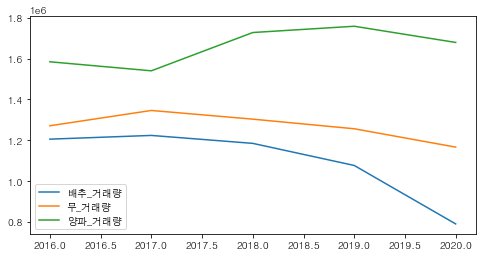

In [198]:
# 배추, 무, 양파

yr_a = amt_yr.iloc[:,[0,1,2,3]] 

plt.figure(figsize = (8,4))

for i in  range(len(yr_a.columns)-1):
    plt.plot(yr_a['year'], yr_a.iloc[:,[i+1]] , label = yr_a.columns[i+1])
    plt.legend()

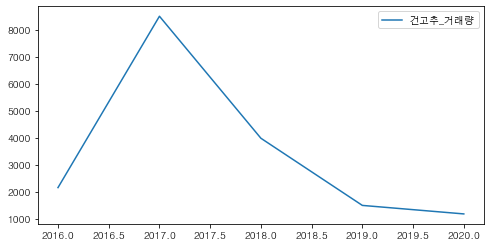

In [202]:
# 건고추

yr_a = amt_yr[['year','건고추_거래량']] 

plt.figure(figsize = (8,4))

for i in  range(len(yr_a.columns)-1):
    plt.plot(yr_a['year'], yr_a.iloc[:,[i+1]] , label = yr_a.columns[i+1])
    plt.legend()

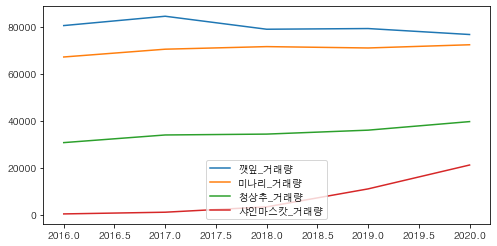

In [299]:
# 깻잎, 미나리, 청상추, 샤인마스캇

yr_a = amt_yr[['year','깻잎_거래량','미나리_거래량','청상추_거래량','샤인마스캇_거래량']]

plt.figure(figsize = (8,4))

for i in  range(len(yr_a.columns)-1):
    plt.plot(yr_a['year'], yr_a.iloc[:,[i+1]] , label = yr_a.columns[i+1])
    plt.legend()

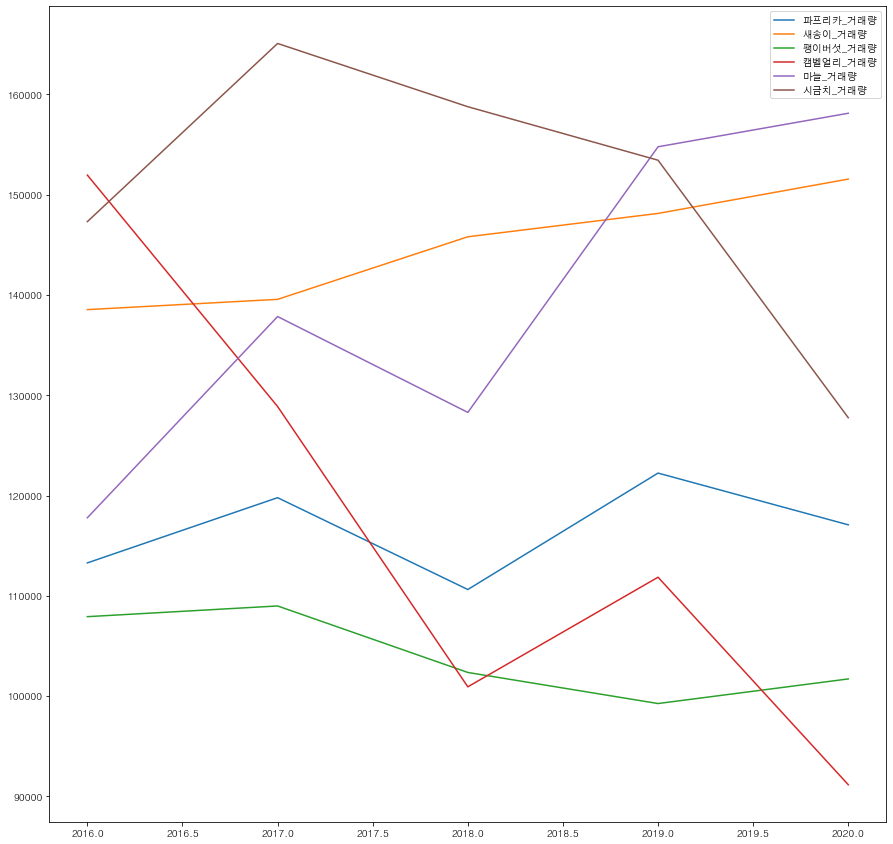

In [364]:
# 파프리카, 새송이, 팽이버섯, 캠벨얼리

yr_a = amt_yr[['year','파프리카_거래량','새송이_거래량','팽이버섯_거래량','캠벨얼리_거래량','마늘_거래량','시금치_거래량']]

plt.figure(figsize = (15,15))

for i in  range(len(yr_a.columns)-1):
    plt.plot(yr_a['year'], yr_a.iloc[:,[i+1]] , label = yr_a.columns[i+1])
    plt.legend()

- 캠벨얼리 거래량 무슨일..

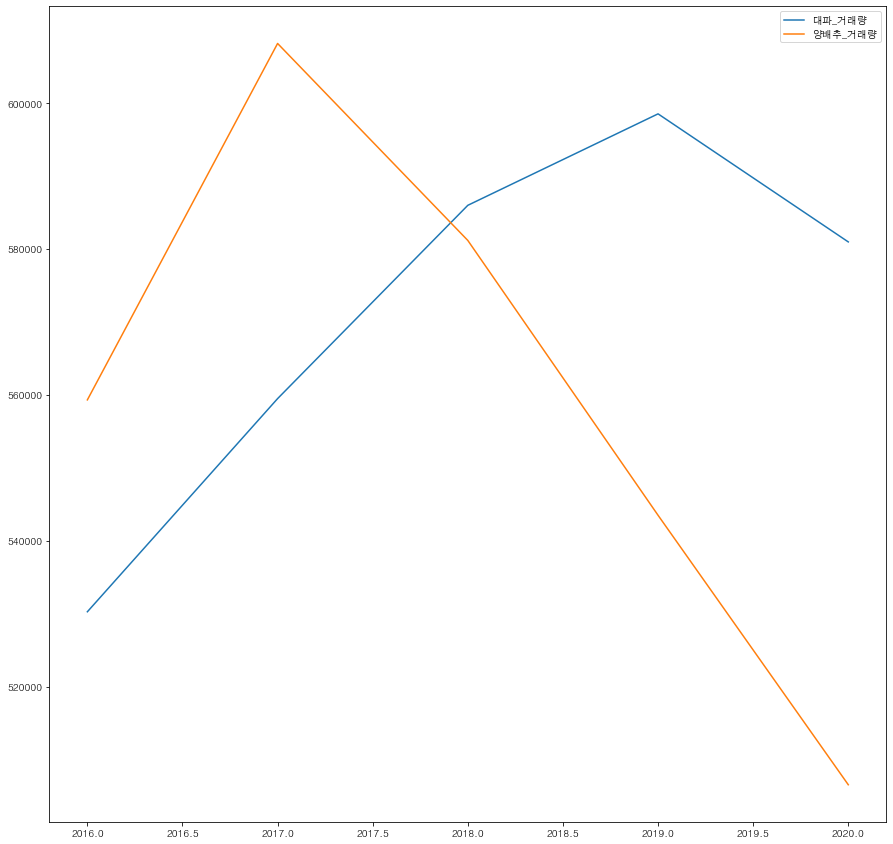

In [298]:
# 대파, 양배추
yr_a = amt_yr[['year','대파_거래량','양배추_거래량']]

plt.figure(figsize = (15,15))

for i in  range(len(yr_a.columns)-1):
    plt.plot(yr_a['year'], yr_a.iloc[:,[i+1]] , label = yr_a.columns[i+1])
    plt.legend()

> [배추, 무, 양파],[깻잎, 미나리, 청상추, 샤인머스캇],[파프리카, 새송이, 팽이버섯, 캠벨얼리, 마늘, 시금치],[대파, 양배추],[건고추] 묶음으로 거래량 단위가 크게 차이난다.

- 양배추, 건고추,배추  2017년 이후로 거래량이 감소
- 켐벨얼리 거래량은 계속 감소
- 대파는 2019년 5월까지 증가하는 형태다가 2020년에서 감소하는데 2020년은 9월까지밖에 없다.

##### 월별 거래량 

In [226]:
amt_mt = train_amt.groupby(train_amt['month']).mean().reset_index()
amt_mt = amt_mt.drop(['year','date'], axis = 1)
amt_mt

month        배추_거래량         무_거래량        양파_거래량       건고추_거래량  \
0       1  7.132287e+05  1.230801e+06  1.325604e+06   1141.196774   
1       2  7.200983e+05  1.228975e+06  1.342692e+06   1622.623944   
2       3  7.823302e+05  1.287772e+06  1.457884e+06    834.305161   
3       4  8.347298e+05  1.182060e+06  2.131762e+06    980.784667   
4       5  9.301451e+05  1.172048e+06  2.434105e+06    910.726452   
5       6  1.051308e+06  1.082876e+06  2.487228e+06    738.427333   
6       7  9.541046e+05  1.025619e+06  1.386109e+06    884.043226   
7       8  9.864161e+05  1.089253e+06  1.419119e+06   4371.430968   
8       9  1.363618e+06  1.422051e+06  1.483011e+06   3858.743243   
9      10  1.310606e+06  1.332548e+06  1.392436e+06   5242.268548   
10     11  2.736011e+06  2.155257e+06  1.492201e+06  19132.834167   
11     12  1.405576e+06  1.290340e+06  1.392546e+06   7534.506452   

           마늘_거래량         대파_거래량      얼갈이배추_거래량        양배추_거래량         깻잎_거래량  \
0    96994.624516  619896.109677  173251.621290  545828.096129   57186.289032   
1   104819.923239  620667.763380  180790.350704  561431.617606   69529.878873   
2   122334.667742  653087.418710  232291.320000  601773.681290   78466.551613   
3   137507.235333  586556.955333  306049.805333  550223.551333   82756.715333   
4   312031.978710  540944.994839  325474.238710  575460.538065   90434.905806   
5   299696.530667  519517.554667  314145.195333  583261.682667  102489.306667   
6   105512.847742  489422.627742  276573.121935  517560.472258   93911.443226   
7    85085.609032  501783.101290  263404.149677  568793.572258   83981.660645   
8    89125.232432  564646.858784  308793.819595  572248.454730   80122.956757   
9    83206.039516  549639.670161  282324.025000  565695.682258   83513.630645   
10  112137.449167  608261.404167  220583.534167  549541.963333   73131.532500   
11   84027.729032  606017.795968  172056.481452  556702.054032   62132.523387   

          시금치_거래량        미나리_거래량         당근_거래량       파프리카_거래량        새송이_거래량  \
0   276215.407742   52434.261935  280264.793548   73985.645161  149635.222581   
1   256658.521127   61646.749296  289814.341549   84192.224648  142109.136620   
2   213811.467742   99784.359355  299978.078065  103843.010323  145809.111613   
3   148367.630667  118831.318667  280812.150667  125508.626000  147850.301333   
4   121447.813548   89486.903871  295189.760645  143883.949677  145471.083871   
5    97733.078667   73497.615333  283796.074667  163910.564667  138612.522667   
6    56271.821935   55890.334194  247181.696774  161872.590323  138100.745161   
7    19134.921290   40956.578065  246938.471613  106139.853548  140809.071613   
8    75497.265541   48680.681081  279676.236486   92802.502703  154957.500676   
9   138515.592742   55767.112097  266823.713710   99142.116935  140961.325000   
10  198844.668333   79878.249167  269401.321667  126504.732500  143301.914167   
11  248720.991935   66703.777419  257086.225000  113206.533871  143751.808871   

         팽이버섯_거래량        토마토_거래량       청상추_거래량       백다다기_거래량        애호박_거래량  \
0   100932.085161  139298.828387  28506.176129  158148.661935  207762.558710   
1   102495.642254  199414.291549  30810.508451  208909.545070  220108.462676   
2   109842.626452  321682.597419  36799.280000  361041.293548  275186.326452   
3   110439.836000  485147.573333  40343.224000  657935.389333  381357.034667   
4   110957.860000  584935.685806  40469.056129  889501.927742  403219.743226   
5   104372.568000  583668.040667  35848.205333  934088.265333  395946.810000   
6   102734.185161  356894.323871  33746.845161  469169.598710  308415.191613   
7   102441.628387  326567.921935  33283.745161  323120.388387  277088.003871   
8    97854.243919  209595.087162  35029.739189  281543.891892  296345.775676   
9    97869.448387  215924.573387  33818.911290  283307.050806  307766.665323   
10  102688.771667  165629.374167  34155.809167  203631.651667  297031.103333   
11  105976.186290  150257.122581  3290

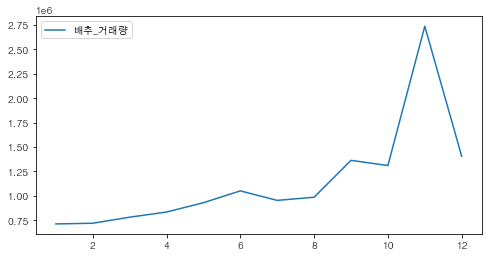

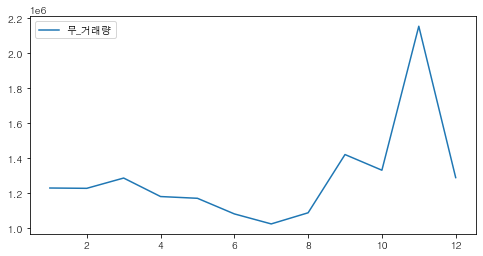

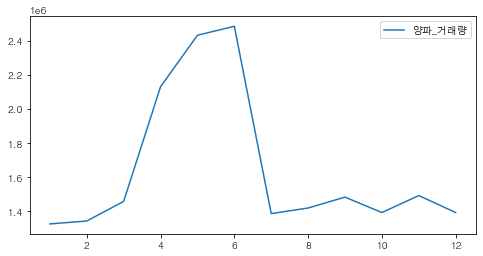

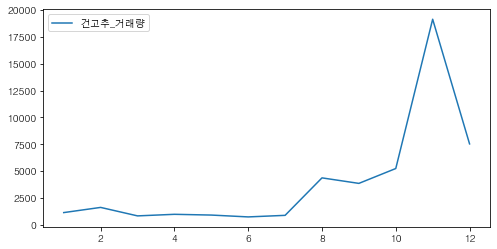

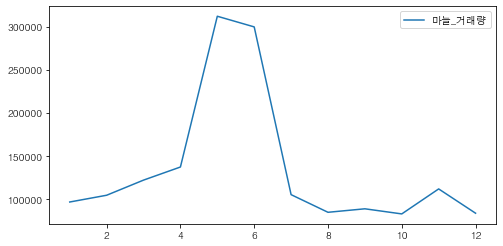

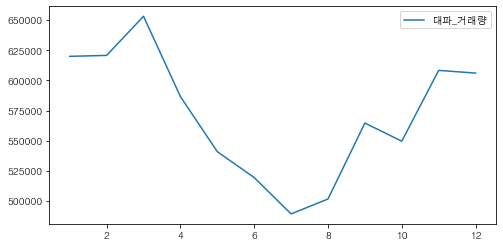

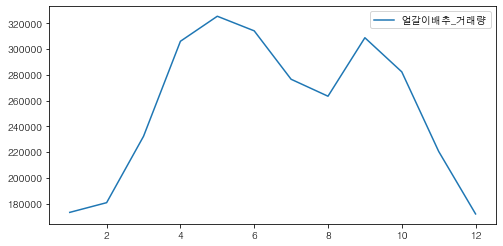

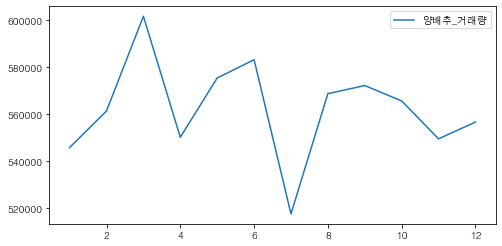

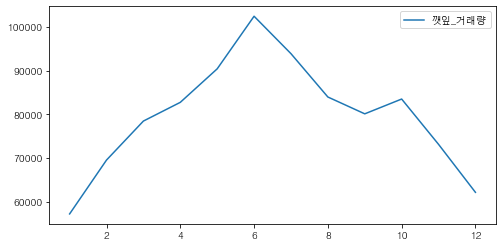

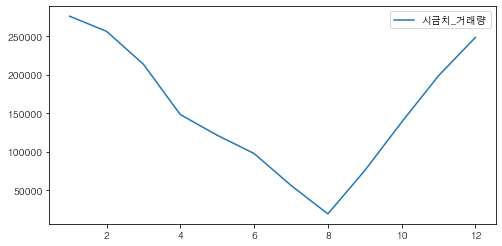

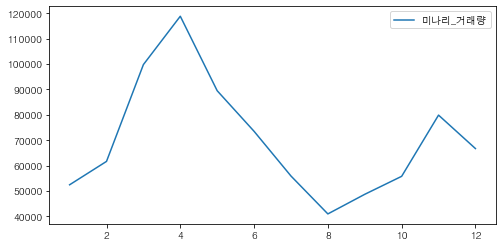

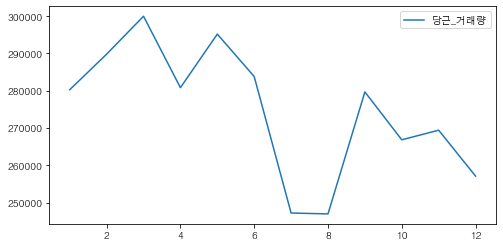

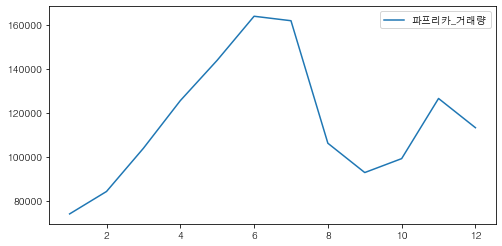

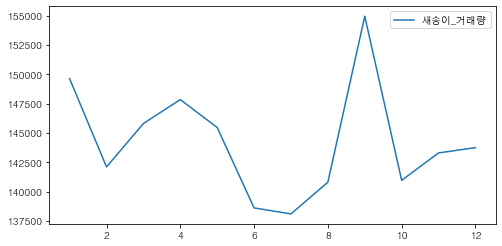

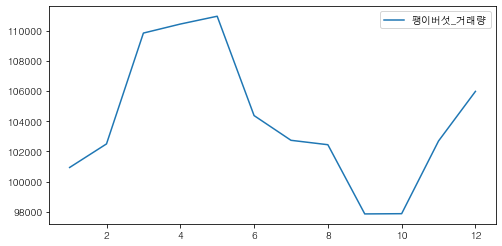

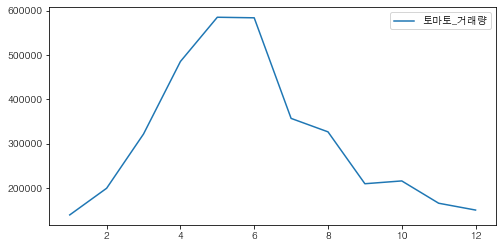

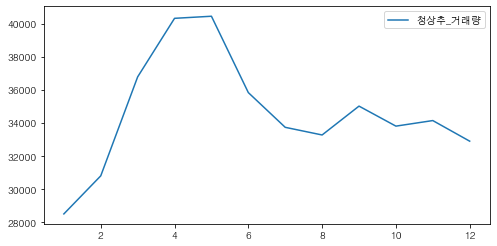

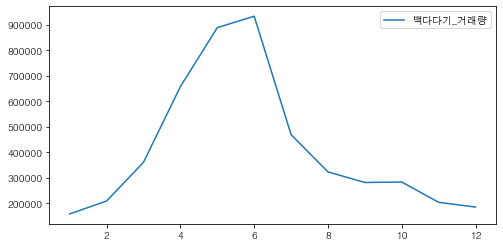

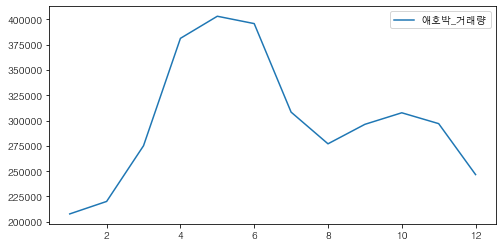

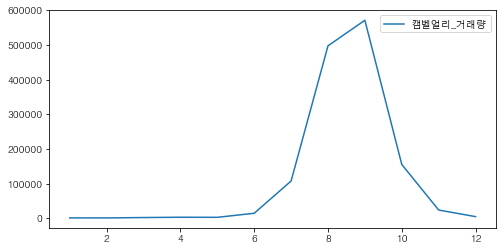

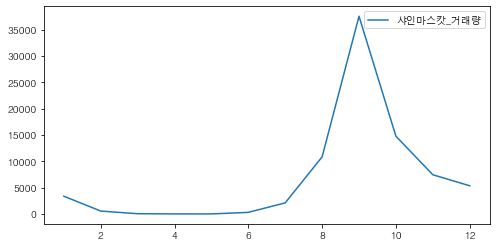

In [234]:
for i in  range(len(amt_mt.columns)-1):
    plt.figure(figsize = (8,4))
    plt.plot(amt_mt['month'], amt_mt.iloc[:,i+1], label = amt_mt.columns[i+1])
    plt.legend()
    plt.show()

- 품목/품종별로 재배시기에 따른 거래량 차이? 

##### 요일별 거래량

In [239]:
amt_day = train_amt.groupby(train_amt['요일']).mean().reset_index()
amt_day = amt_day.drop(['year','date','month'], axis = 1).reindex(index = [3,6,2,1,0,5,4])
amt_day

요일        배추_거래량         무_거래량        양파_거래량       건고추_거래량         마늘_거래량  \
3  월요일  1.554184e+06  1.733229e+06  2.213011e+06   1705.870968  166306.812097   
6  화요일  1.349449e+06  1.535991e+06  1.966452e+06   2347.528745  176623.821457   
2  수요일  1.311055e+06  1.510527e+06  1.926130e+06  13670.577328  152224.588259   
1  목요일  1.296214e+06  1.480867e+06  1.951548e+06   2316.580162  197928.978138   
0  금요일  1.308000e+06  1.471750e+06  1.928735e+06   3901.031855  158666.489113   
5  토요일  9.722325e+05  1.188478e+06  1.610129e+06   1136.272984  117014.810081   
4  일요일  2.511479e+03  2.405700e+03  3.914905e+03      2.570161     103.633065   

          대파_거래량      얼갈이배추_거래량        양배추_거래량         깻잎_거래량        시금치_거래량  \
3  728158.025806  330306.668952  737011.378629  121334.658871  196062.458871   
6  677701.039271  311673.517814  678237.917004   86335.597976  174277.936032   
2  662254.940891  304772.704453  661962.559109   89159.583806  178016.336842   
1  650373.054656  294455.332389  646733.188259   85644.559919  171631.144534   
0  651052.421774  293579.918952  652123.840323   89065.020161  177291.979435   
5  623032.020968  259755.543548  563057.082258   89760.791532  164414.693145   
4    2157.393548     340.239919     421.092742     120.845161     416.160081   

        미나리_거래량         당근_거래량       파프리카_거래량        새송이_거래량       팽이버섯_거래량  \
3  88962.229839  403444.023790  159462.618145  191844.169355  126303.996371   
6  85300.098785  362249.953441  118701.623077  172702.705668  123032.772470   
2  82549.893117  333417.307692  142525.148178  160934.975709  120106.610121   
1  70907.169636  326823.202024  135402.676923  157464.634818  122073.258704   
0  83139.222984  323437.853226  143694.981452  160992.834677  121534.553226   
5  82113.420161  177087.211694  116371.830645  166250.264919  116167.928226   
4    149.273790     286.895161      45.789113     485.024194     192.951613   

         토마토_거래량       청상추_거래량       백다다기_거래량        애호박_거래량       캠벨얼리_거래량  \
3  497254.834274  44514.786290  729630.888710  495155.493952  165328.516532   
6  343806.917814  41281.565182  442392.169231  327314.213765  137936.251822   
2  364621.689879  39504.046154  459970.245749  353864.541700  135448.350202   
1  294712.064777  38221.142105  428946.235223  284881.810121  128515.102834   
0  375591.946774  38676.401210  450229.131048  352422.520161  128497.570161   
5  357549.569355  40747.475403  453028.156048  303731.614516  131491.776613   
4     326.850806     58.225806      90.116935     286.665323    1461.814113   

     샤인마스캇_거래량  
3  9397.247581  
6  7472.945749  
2  7145.667206  
1  7323.653036  
0  7362.112097  
5  8091.617742  
4    45.939516

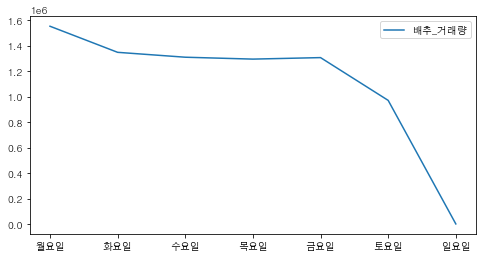

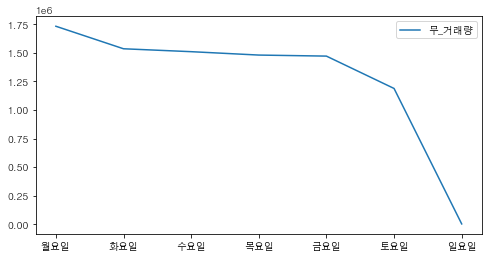

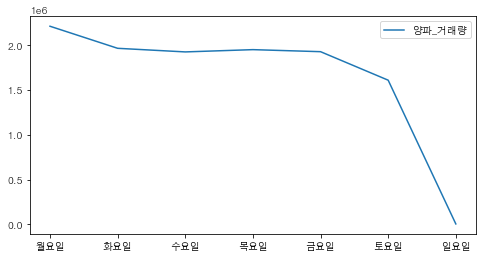

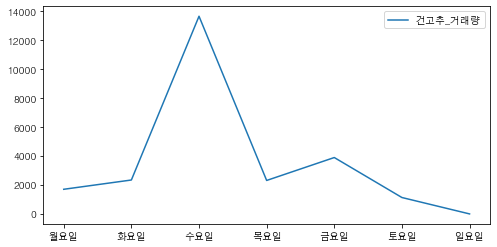

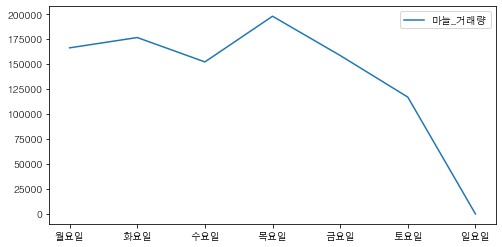

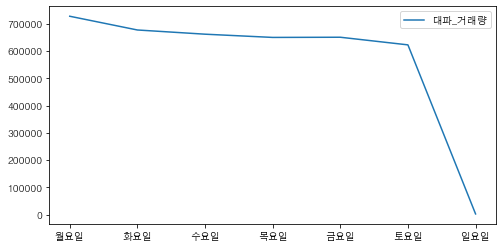

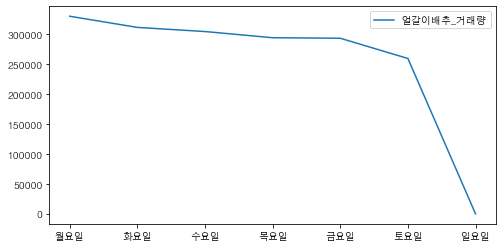

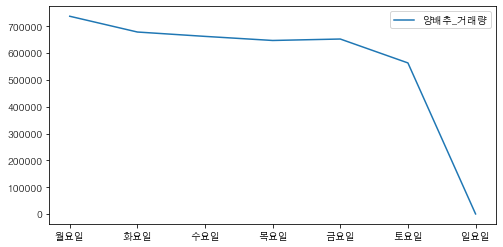

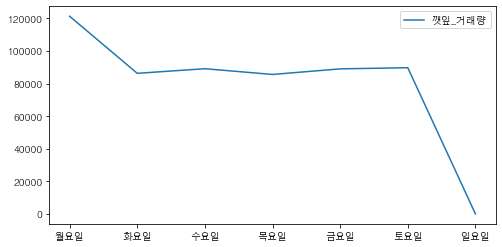

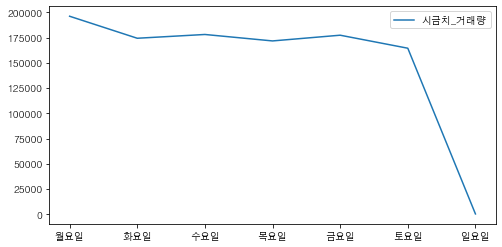

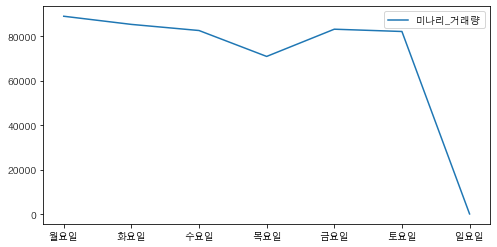

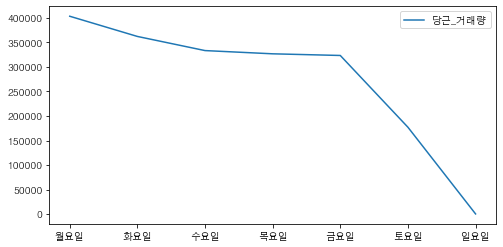

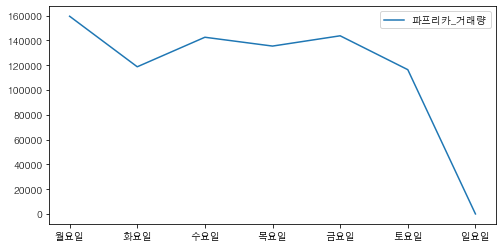

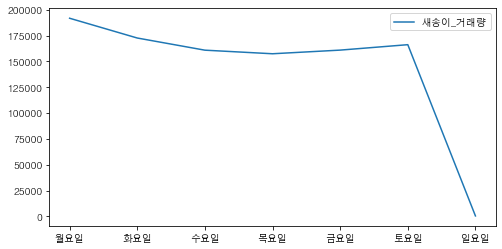

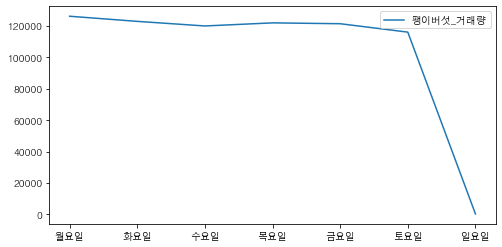

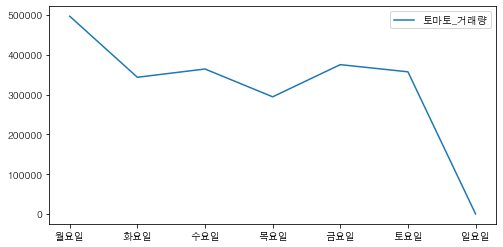

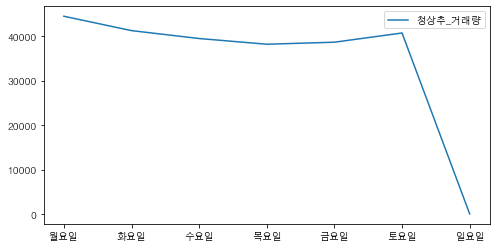

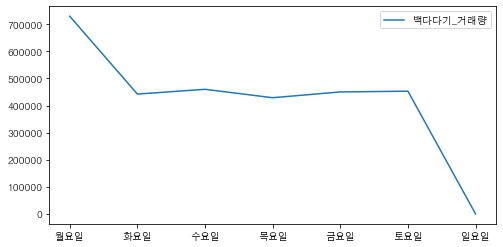

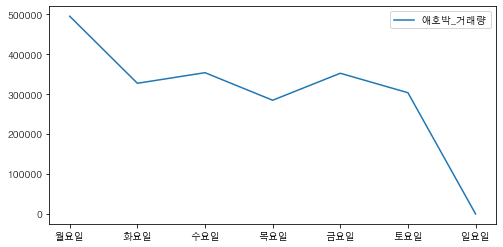

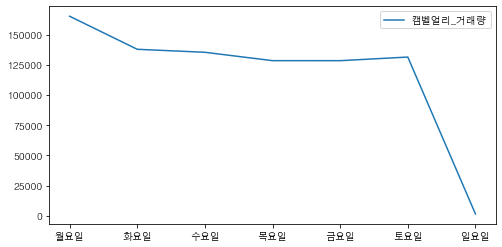

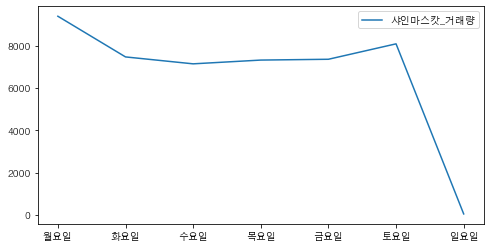

In [240]:
for i in  range(len(amt_day.columns)-1):
    plt.figure(figsize = (8,4))
    plt.plot(amt_day['요일'], amt_day.iloc[:,i+1], label = amt_day.columns[i+1])
    plt.legend()
    plt.show()

#### 가격

In [280]:
train_prc = train.iloc[:,[0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45]]

##### 가격이 0 

In [281]:
train_prc['품목총가격'] = train_prc.iloc[:,4:].sum(axis =1)
train_prc[['year','month','date','요일','품목총가격']][train_prc.품목총가격 == 0].요일.value_counts()

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


일요일    226
금요일      4
월요일      4
화요일      4
토요일      4
수요일      3
목요일      2
Name: 요일, dtype: int64

- 아마 거래량이 0 이라 계산이 안될걼도

In [282]:
# 가격이 0 인 행 제거

train_prc = train_prc.drop(train_prc[['year','month','date','요일','품목총가격']][train_prc.품목총가격 == 0].index)

##### 년도별 가격 평균 

In [283]:
prc_yr = train_prc.groupby('year').mean().reset_index()
prc_yr = prc_yr.drop(['month','date','품목총가격'] , axis = 1)
prc_yr

year       배추_가격        무_가격        양파_가격        건고추_가격        마늘_가격  \
0  2016  826.878205  667.435897   880.990385   7163.025641  5085.035256   
1  2017  633.385852  556.340836  1013.945338   9979.151125  4500.816720   
2  2018  600.347267  630.192926   615.826367  11530.282958  4039.974277   
3  2019  557.028754  467.974441   492.849840  12353.230032  3065.747604   
4  2020  915.410042  530.217573   817.297071  15639.644351  3129.585774   

         대파_가격     얼갈이배추_가격      양배추_가격        깻잎_가격       시금치_가격  \
0  1639.233974  1091.724359  705.782051  5176.285256  2988.971154   
1  1394.887460   902.508039  595.565916  4726.012862  2342.032154   
2  1360.665595  1055.765273  579.270096  5494.260450  2849.485531   
3  1113.587859   995.562300  442.000000  5334.670927  2553.178914   
4  1233.150628  1264.292887  777.000000  6414.079498  3141.958159   

        미나리_가격        당근_가격      파프리카_가격       새송이_가격      팽이버섯_가격  \
0  2562.262821  1061.442308  3398.179487  2300.076923  1552.657051   
1  2353.183280   983.372990  3092.581994  2233.607717  1386.254019   
2  2608.125402  1142.768489  3572.964630  2117.411576  1732.189711   
3  2423.421725   944.789137  3304.389776  2192.920128  1969.357827   
4  2496.146444  1238.799163  3965.577406  2045.527197  1664.949791   

        토마토_가격       청상추_가격      백다다기_가격       애호박_가격      캠벨얼리_가격  \
0  2179.782051  3310.419872  1788.782051  1885.602564  3294.243590   
1  1980.762058  2791.800643  1714.450161  1659.196141  3309.315113   
2  2059.231511  3167.398714  1773.877814  1975.504823  3902.964630   
3  2076.000000  3165.105431  1854.261981  1589.297125  3729.728435   
4  2654.138075  3647.811715  2126.246862  2262.615063  4738.560669   

       샤인마스캇_가격  
0   4460.192308  
1   5666.990354  
2   7873.520900  
3  10929.801917  
4  12926.430962

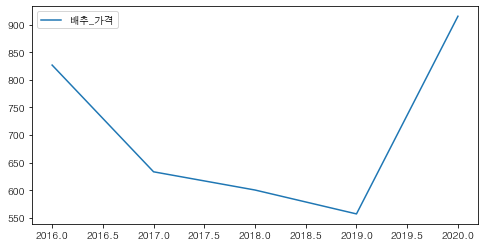

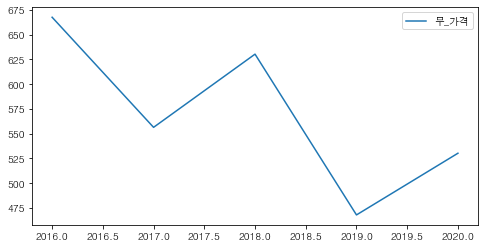

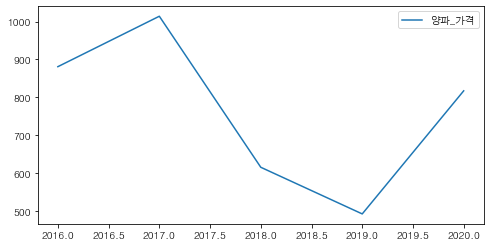

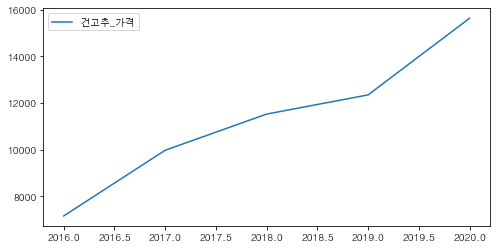

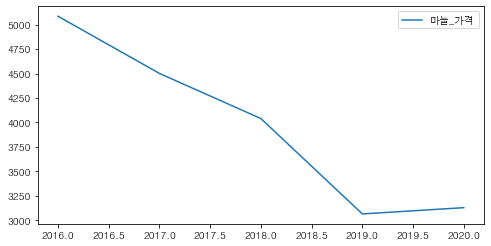

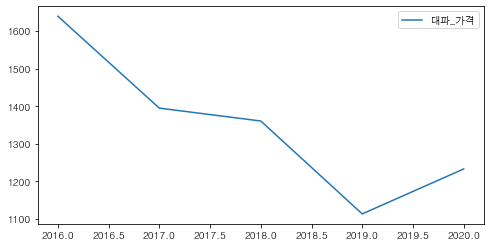

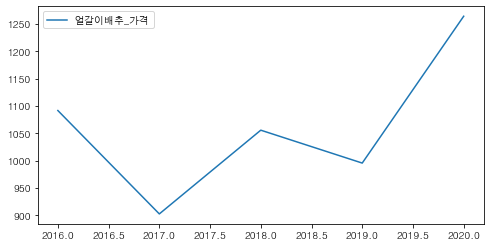

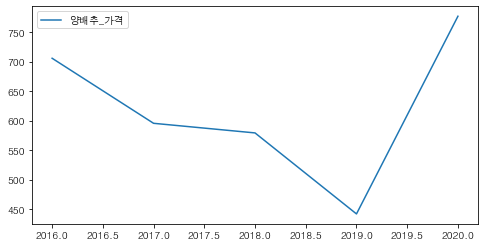

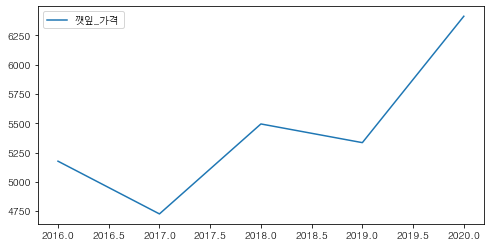

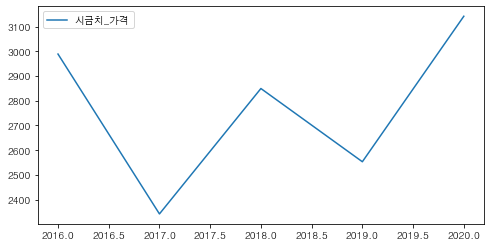

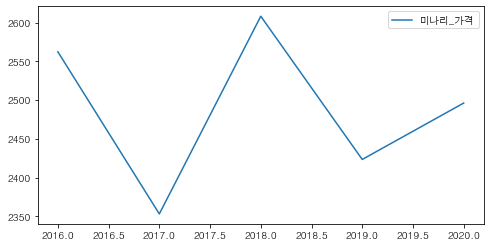

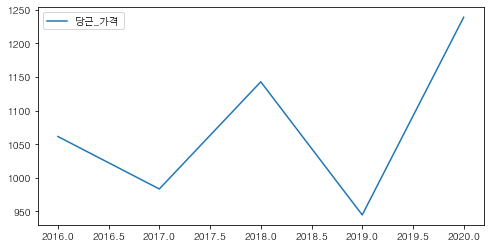

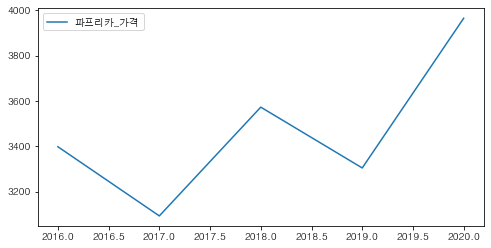

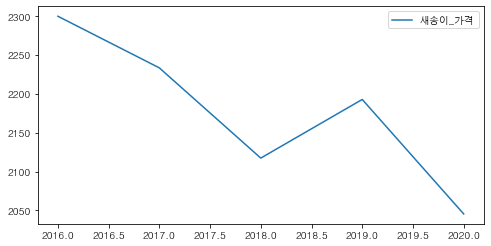

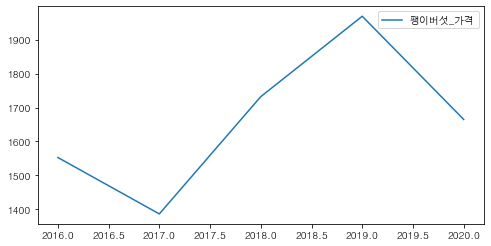

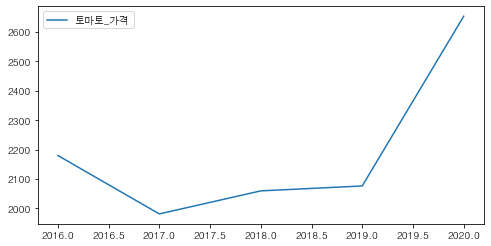

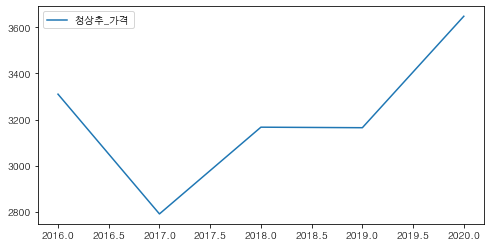

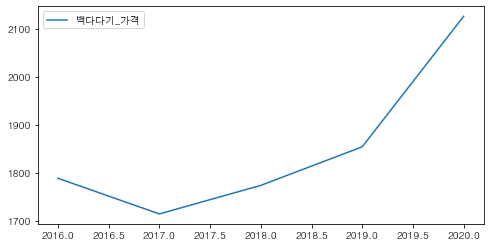

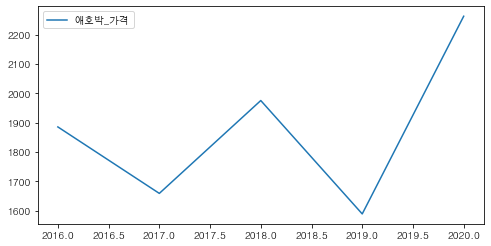

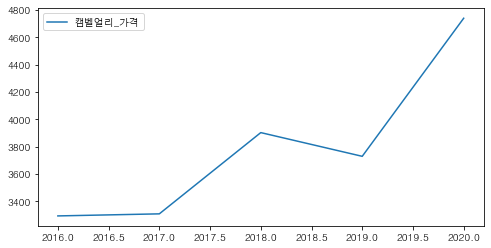

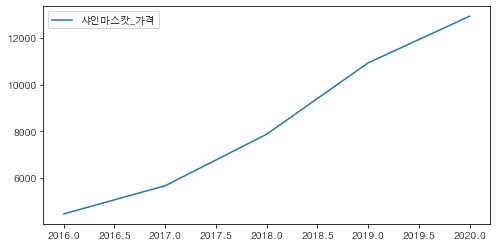

In [284]:
for i in  range(len(prc_yr.columns)-1):
    plt.figure(figsize = (8,4))
    plt.plot(prc_yr['year'], prc_yr.iloc[:,i+1], label = prc_yr.columns[i+1])
    plt.legend()
    plt.show()

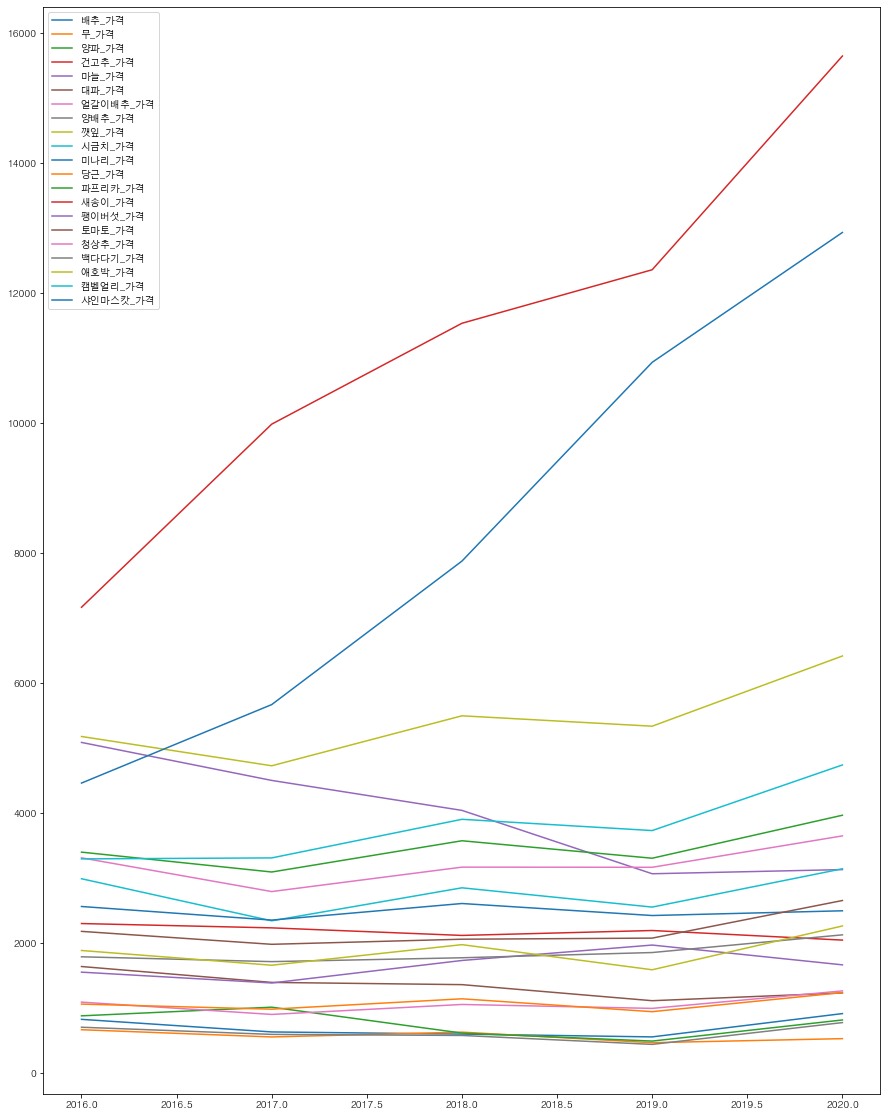

In [294]:
plt.figure(figsize = (15,20))

for i in  range(len(prc_yr.columns)-1):
    plt.plot(prc_yr['year'], prc_yr.iloc[:,[i+1]] , label = prc_yr.columns[i+1])
    plt.legend()

- 건고추랑 샤인마스캇 가격 4년사이에 2배 증가

In [286]:
prc_yr.columns

Index(['year', '배추_가격', '무_가격', '양파_가격', '건고추_가격', '마늘_가격', '대파_가격',
       '얼갈이배추_가격', '양배추_가격', '깻잎_가격', '시금치_가격', '미나리_가격', '당근_가격', '파프리카_가격',
       '새송이_가격', '팽이버섯_가격', '토마토_가격', '청상추_가격', '백다다기_가격', '애호박_가격', '캠벨얼리_가격',
       '샤인마스캇_가격'],
      dtype='object')

In [288]:
# 건고추,샤머 빼고 계산

a = prc_yr[['year', '배추_가격', '무_가격', '양파_가격',  '마늘_가격', '대파_가격',
       '얼갈이배추_가격', '양배추_가격', '깻잎_가격', '시금치_가격', '미나리_가격', '당근_가격', '파프리카_가격',
       '새송이_가격', '팽이버섯_가격', '토마토_가격', '청상추_가격', '백다다기_가격', '애호박_가격', '캠벨얼리_가격']]

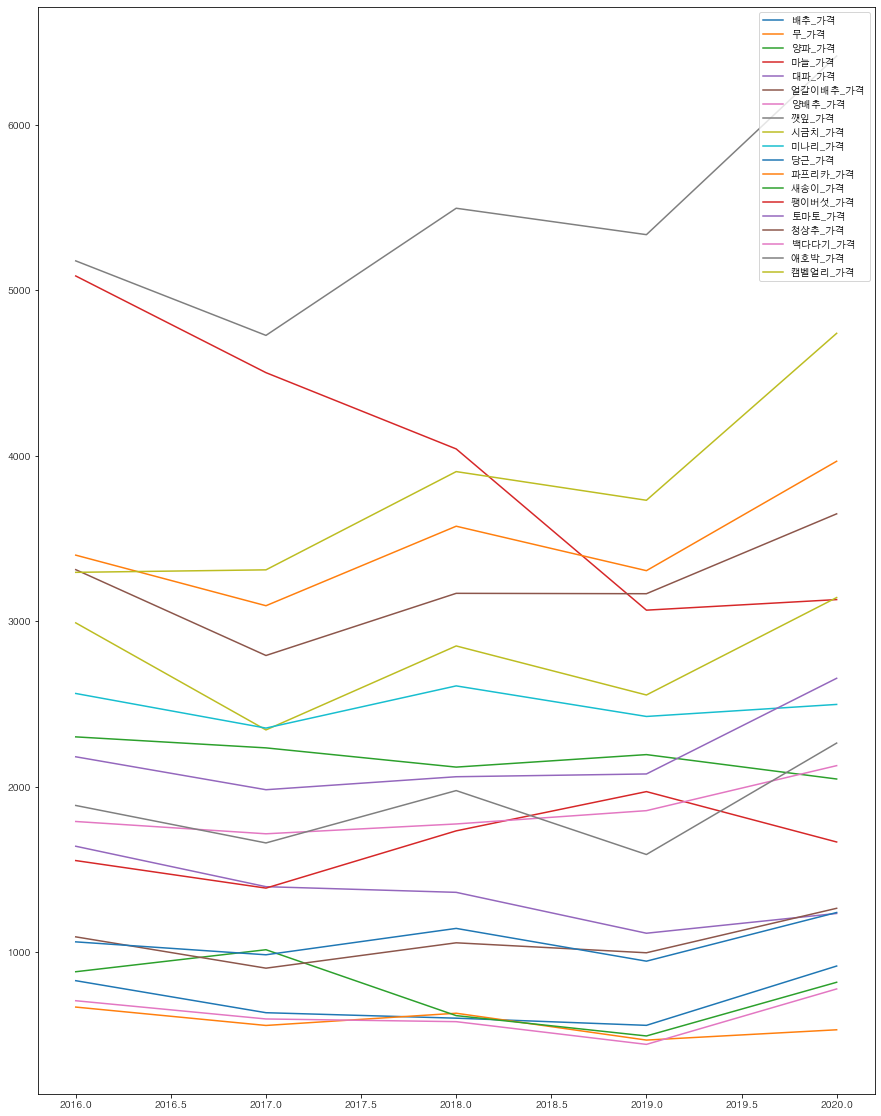

In [293]:
plt.figure(figsize = (15,20))

for i in  range(len(a.columns)-1):
    plt.plot(a['year'], a.iloc[:,[i+1]] , label = a.columns[i+1])
    plt.legend()

- 마늘 가격이 2019년까지 떨어짐
- 애호박이랑 캠벨얼리도 많이 증가

##### 월별 가격 

In [300]:
prc_mt = train_prc.groupby('month').mean().reset_index()
prc_mt = prc_mt.drop(['year','date','품목총가격'] , axis = 1)
prc_mt

month        배추_가격        무_가격       양파_가격        건고추_가격        마늘_가격  \
0       1   577.492424  539.265152  876.204545   9244.007576  4130.303030   
1       2   730.916667  515.883333  968.841667   9784.416667  4201.983333   
2       3   658.496241  546.218045  937.067669  11081.864662  4069.518797   
3       4   672.226562  564.562500  824.593750  10120.351562  4011.757812   
4       5   534.358209  551.014925  638.865672   9734.574627  3153.343284   
5       6   437.561538  430.900000  575.392308  10003.415385  3049.038462   
6       7   633.545455  452.704545  599.250000  10696.901515  3956.681818   
7       8  1005.701493  658.350746  720.164179  14753.850746  4365.343284   
8       9  1238.796875  761.687500  776.140625  13865.070312  4257.820312   
9      10   669.858491  685.688679  701.320755  11294.198113  4261.792453   
10     11   553.942308  534.173077  758.961538  10301.721154  4458.182692   
11     12   601.771429  656.076190  767.580952  12646.904762  4376.333333   

          대파_가격     얼갈이배추_가격      양배추_가격        깻잎_가격       시금치_가격  \
0   1389.333333  1003.969697  603.537879  7859.075758  2094.606061   
1   1504.775000  1106.716667  632.150000  5650.550000  2088.891667   
2   1325.240602  1073.894737  642.909774  4792.082707  1484.270677   
3   1030.539062   899.757812  654.867188  4640.070312  1686.796875   
4   1153.582090   766.485075  562.462687  4505.835821  1698.126866   
5   1131.830769   753.046154  369.684615  3076.700000  1974.369231   
6   1103.287879  1102.113636  423.045455  3943.431818  3295.893939   
7   1604.858209  1569.044776  670.410448  6412.000000  6953.888060   
8   1806.445312  1441.804688  735.218750  7266.179688  4962.976562   
9   1460.292453   988.518868  688.113208  5149.849057  2248.518868   
10  1376.423077   901.923077  711.211538  4575.125000  2075.798077   
11  1409.485714   958.295238  710.971429  6802.104762  2058.457143   

         미나리_가격        당근_가격      파프리카_가격       새송이_가격      팽이버섯_가격  \
0   3269.484848   991.734848  5208.257576  2538.045455  1968.136364   
1   3152.650000   976.425000  4880.608333  2348.850000  1679.691667   
2   2542.052632   948.789474  4083.105263  2163.210526  1584.443609   
3   1594.992188  1073.843750  3376.867188  1968.609375  1457.898438   
4   1285.537313  1046.014925  2566.276119  2059.791045  1284.723881   
5    836.292308  1020.830769  2056.515385  1914.953846  1240.484615   
6   1357.272727   995.606061  1674.462121  1736.287879  1190.136364   
7   3663.485075  1087.261194  3523.067164  2133.559701  1570.141791   
8   3624.710938  1268.601562  4912.968750  2548.257812  2287.335938   
9   2281.886792  1198.679245  3611.990566  2303.216981  2173.169811   
10  3392.509615  1136.740385  2544.980769  2207.788462  1840.211538   
11  3196.666667  1093.542857  2724.304762  2376.304762  1852.076190   

         토마토_가격       청상추_가격      백다다기_가격       애호박_가격      캠벨얼리_가격  \
0   2315.454545  3264.681818  2674.507576  2832.825758  3279.439394   
1   2557.283333  2275.183333  2470.266667  2659.616667  4064.758333   
2   3054.120301  2228.000000  2189.000000  2275.466165  3955.947368   
3   2647.085938  1922.101562  1382.562500  1346.218750  3683.171875   
4   1616.559701  1910.119403  1129.537313  1175.111940  4999.679104   
5   1169.815385  2217.576923  1066.246154  1079.853846  6088.430769   
6   1338.446970  4330.969697  1583.121212  1247.007576  4278.446970   
7   1580.544776  5862.813433  2149.007463  2052.440299  3057.425373   
8   2905.171875  5486.117188  1944.070312  2355.726562  2750.125000   
9   2536.622642  4389.273585  1585.584906  1583.792453  2680.311321   
10  2150.605769  2079.201923  1825.451923  1635.298077  2816.442308   
11  2300.457143  2067.476190  2097.961905  2018.200000  2738.647619   

        샤인마스캇_가격  
0    7748.462121  
1    4671.141667  
2    2152.218045  
3     333.976562  
4     913.335821  
5   18020.615385  
6   15239.515152  
7   10792.477612  
8    8862.757812  
9    8473.000000  
10  11255.307692  
11  10236.17142

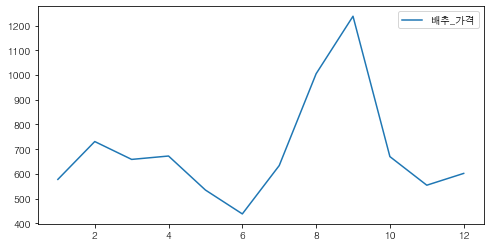

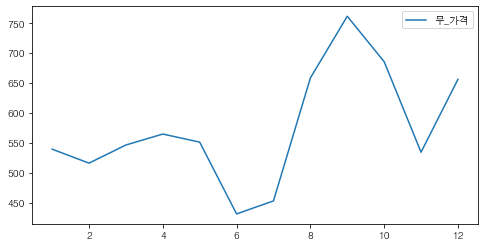

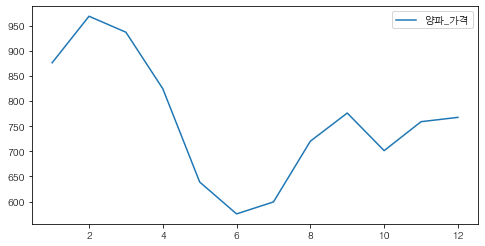

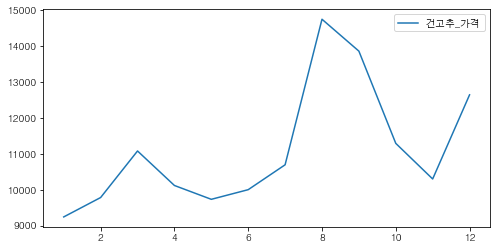

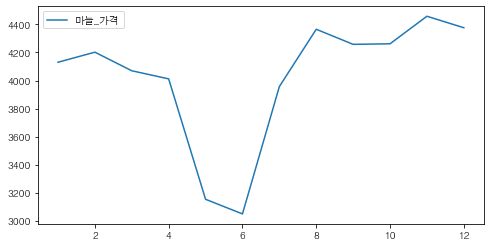

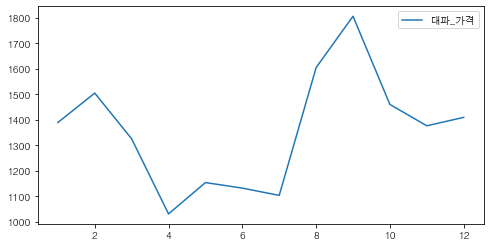

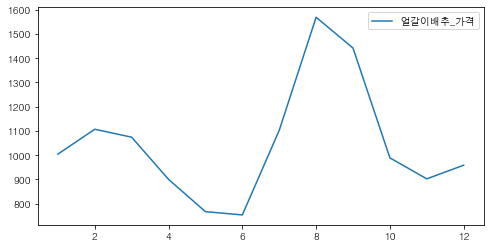

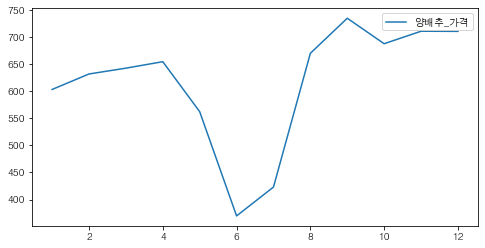

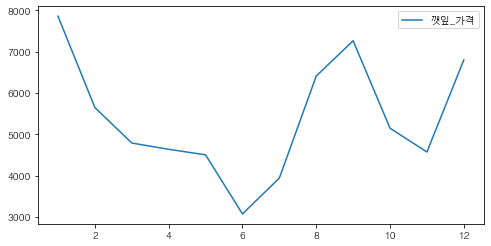

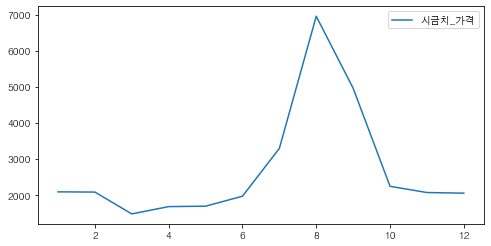

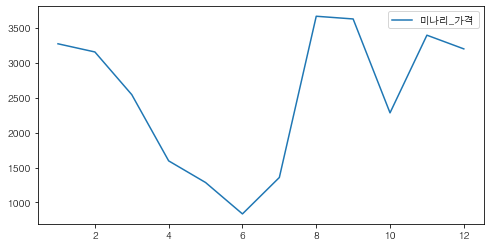

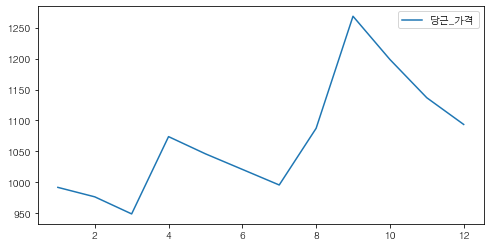

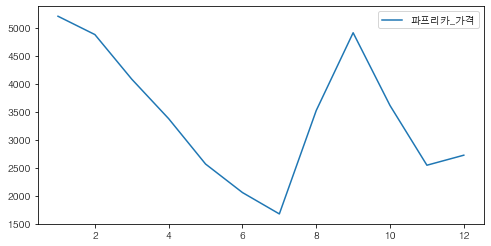

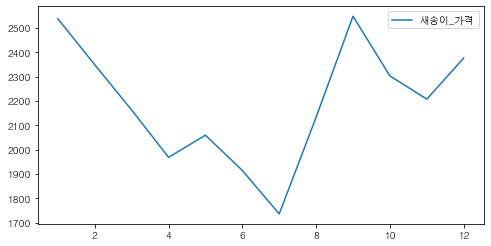

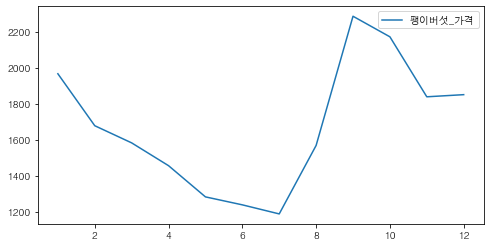

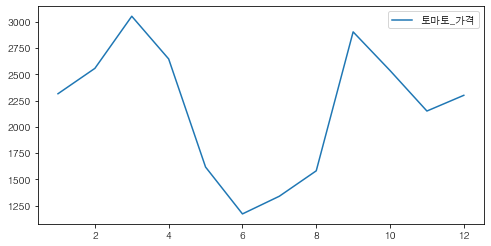

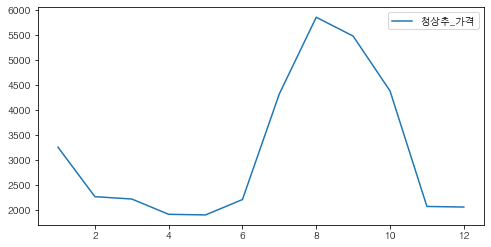

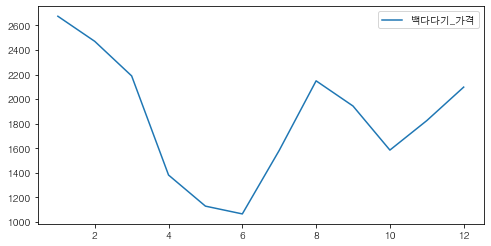

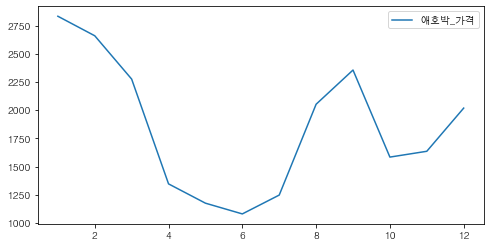

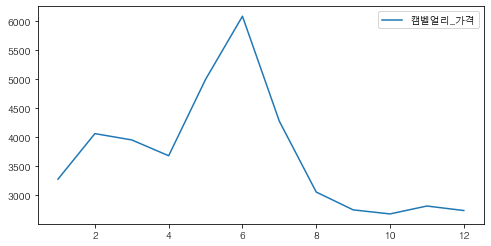

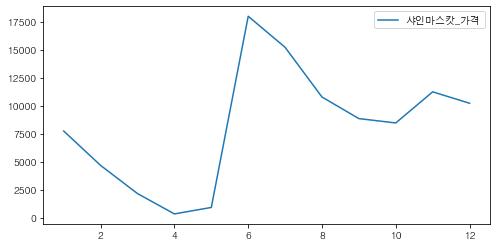

In [303]:
for i in  range(len(prc_mt.columns)-1):
    plt.figure(figsize = (8,4))
    plt.plot(prc_mt['month'], prc_mt.iloc[:,i+1], label = prc_mt.columns[i+1])
    plt.legend()
    plt.show()

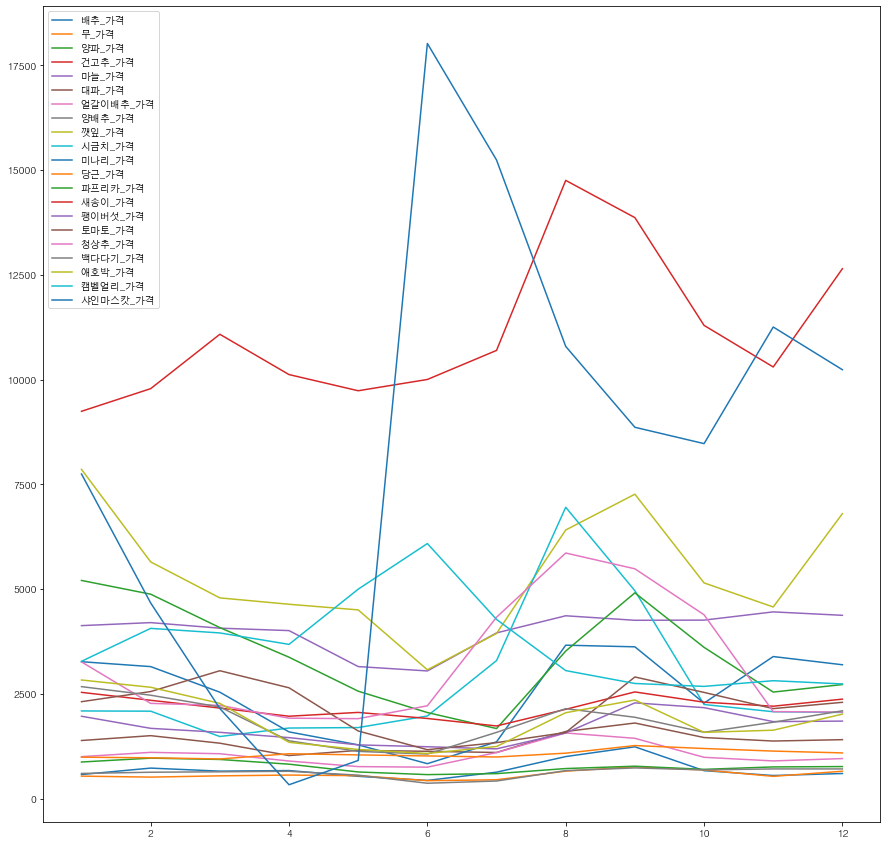

In [365]:
plt.figure(figsize = (15,15))

for i in  range(len(prc_mt.columns)-1):
    plt.plot(prc_mt['month'], prc_mt.iloc[:,[i+1]] , label = prc_mt.columns[i+1])
    plt.legend()

- 샤인마스캇 5월~6월 가격 에바
- 건고추 가격이 좀 높은편

In [305]:
train_prc

year  month  date   요일   배추_가격    무_가격   양파_가격   건고추_가격   마늘_가격   대파_가격  \
1     2016      1     2  토요일   329.0   360.0  1281.0  11000.0  5475.0  1704.0   
3     2016      1     4  월요일   478.0   382.0  1235.0   4464.0  5210.0  1716.0   
4     2016      1     5  화요일   442.0   422.0  1213.0   4342.0  5387.0  1715.0   
5     2016      1     6  수요일   442.0   409.0  1263.0   7041.0  5013.0  1620.0   
6     2016      1     7  목요일   448.0   428.0  1241.0   3908.0  4360.0  1545.0   
...    ...    ...   ...  ...     ...     ...     ...      ...     ...     ...   
1728  2020      9    24  목요일  1839.0   990.0   990.0  19101.0  4775.0  2380.0   
1729  2020      9    25  금요일  1789.0  1011.0   955.0  23095.0  5039.0  2239.0   
1730  2020      9    26  토요일  1760.0  1075.0   961.0  22510.0  5565.0  2126.0   
1731  2020      9    27  일요일  3066.0  1139.0  1056.0  22333.0  5227.0  1866.0   
1732  2020      9    28  월요일  1867.0  1147.0   964.0  22022.0  4757.0  2614.0   

      얼갈이배추_가격  양배추_가격    깻잎_가격  시금치_가격  미나리_가격   당근_가격  파프리카_가격  새송이_가격  \
1       1331.0   348.0  13242.0  2339.0  1729.0   804.0   3703.0  2576.0   
3       1212.0   345.0   9923.0  2153.0  3960.0   794.0   4871.0  2440.0   
4       1197.0   350.0   9529.0  2220.0  3333.0   763.0   5129.0  2437.0   
5       1142.0   327.0   8123.0  2219.0  3133.0   787.0   5120.0  2343.0   
6        992.0   315.0   6793.0  2208.0  2259.0   770.0   5095.0  2291.0   
...        ...     ...      ...     ...     ...     ...      ...     ...   
1728    1868.0  1143.0  10028.0  6329.0  4950.0  1565.0   9206.0  2927.0   
1729    2047.0  1090.0  10921.0  6262.0  2595.0  1773.0   9084.0  2994.0   
1730    2095.0  1326.0  10607.0  7123.0  4310.0  1405.0   9198.0  2942.0   
1731     798.0   998.0  12195.0  7178.0  1869.0  3750.0      0.0  2946.0   
1732    2349.0  1423.0  11164.0  8145.0  7196.0  2001.0   9393.0  3360.0   

      팽이버섯_가격  토마토_가격  청상추_가격  백다다기_가격  애호박_가격  캠벨얼리_가격  샤인마스캇_가격     품목총가격  
1      1474.0  1621.0  9235.0   2109.0  2414.0   2014.0       0.0   65088.0  
3      1750.0  1834.0  7631.0   2046.0  2018.0   3885.0       0.0   58347.0  
4      1822.0  1833.0  6926.0   2268.0  2178.0   2853.0       0.0   56359.0  
5      1519.0  1999.0  5511.0   2535.0  2503.0   2119.0       0.0   55168.0  
6      1365.0  1921.0  4384.0   2440.0  2533.0   2997.0       0.0   48293.0  
...       ...     ...     ...      ...     ...      ...       ...       ...  
1728   2545.0  5587.0  4509.0   3001.0  3426.0   3620.0   10940.0  101719.0  
1729   2598.0  5596.0  4178.0   2999.0  3357.0   3618.0   10844.0  104084.0  
1730   2617.0  5262.0  3770.0   3065.0  3092.0   3691.0   10636.0  105136.0  
1731   2573.0  3781.0  4076.0   3707.0  3252.0   3567.0   10699.0   96076.0  
1732   3069.0  5024.0  4167.0   2873.0  2782.0   3761.0   10998.0  111076.0  

[1486 rows x 26 columns]

##### 요일별 가격 

In [307]:
prc_day = train_prc.groupby('요일').mean().reset_index()
prc_day = prc_day.drop(['year','date','month','품목총가격'] , axis = 1).reindex(index = [3,6,2,1,0,5,4])
prc_day

요일        배추_가격        무_가격       양파_가격        건고추_가격        마늘_가격  \
3  월요일   694.643443  570.549180  767.573770  11108.762295  4011.139344   
6  화요일   683.670782  578.032922  764.707819  10951.415638  4119.399177   
2  수요일   695.110656  568.635246  771.094262  10469.709016  4093.704918   
1  목요일   676.722449  579.959184  759.273469  11577.812245  3904.469388   
0  금요일   679.139344  572.311475  754.594262  10807.893443  4074.631148   
5  토요일   710.581967  567.389344  762.938525  12616.196721  4074.782787   
4  일요일  1122.227273  538.636364  625.681818   2288.681818  1209.954545   

         대파_가격     얼갈이배추_가격      양배추_가격        깻잎_가격       시금치_가격  \
3  1387.733607  1128.483607  635.795082  5378.631148  2903.991803   
6  1382.711934  1082.967078  623.444444  5400.757202  2792.411523   
2  1347.336066  1042.274590  606.959016  5349.655738  2702.737705   
1  1347.648980  1025.836735  607.783673  5302.032653  2705.591837   
0  1332.770492  1030.491803  604.860656  5378.065574  2716.836066   
5  1342.741803  1062.819672  611.258197  5412.106557  2770.598361   
4  1151.772727   386.090909  420.818182  6106.227273  2217.818182   

        미나리_가격        당근_가격      파프리카_가격       새송이_가격      팽이버섯_가격  \
3  2699.139344  1138.852459  3519.528689  2199.995902  1744.278689   
6  2554.954733  1087.917695  3592.230453  2203.950617  1746.415638   
2  2436.422131  1064.250000  3500.987705  2196.479508  1675.840164   
1  2439.032653  1079.306122  3480.600000  2171.583673  1638.555102   
0  2392.971311  1071.971311  3424.606557  2178.118852  1611.487705   
5  2504.639344   986.557377  3345.581967  2182.709016  1638.471311   
4  1408.727273   707.272727  1121.500000  1894.363636   694.227273   

        토마토_가격       청상추_가격      백다다기_가격       애호박_가격      캠벨얼리_가격  \
3  2183.278689  3385.709016  1814.770492  1810.270492  3777.627049   
6  2131.094650  3208.732510  1857.106996  1860.728395  3799.242798   
2  2152.827869  3065.163934  1824.590164  1877.614754  3728.139344   
1  2223.791837  3080.420408  1871.232653  1907.232653  3721.546939   
0  2243.692623  3205.274590  1895.381148  1899.413934  3854.918033   
5  2162.401639  3340.217213  1841.987705  1811.180328  3824.315574   
4  1130.681818  1960.409091   994.363636  1466.227273  1391.318182   

      샤인마스캇_가격  
3  8445.270492  
6  8380.477366  
2  8011.852459  
1  8137.885714  
0  8098.204918  
5  8288.098361  
4  3140.454545

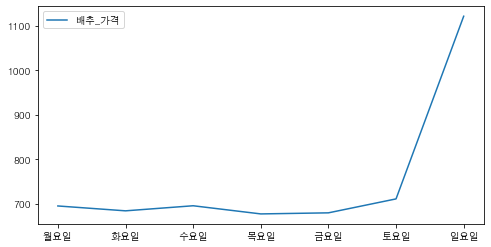

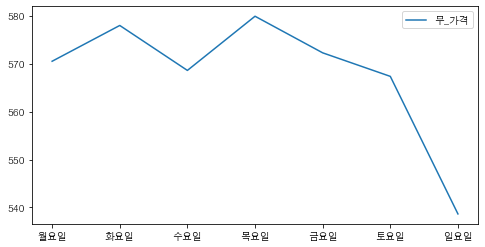

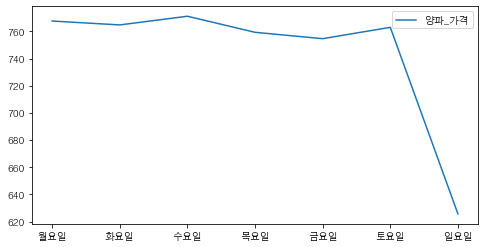

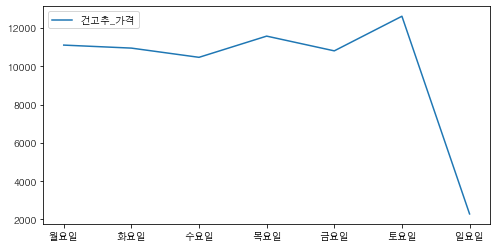

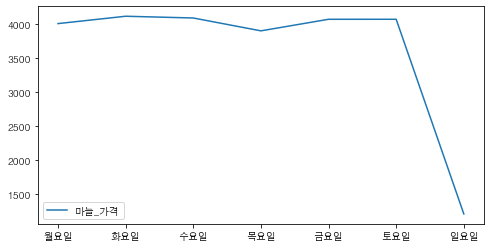

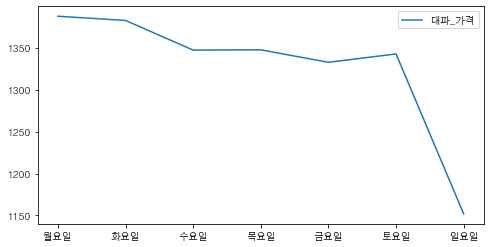

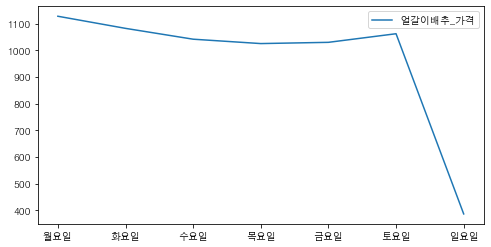

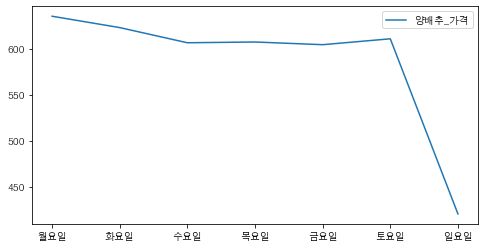

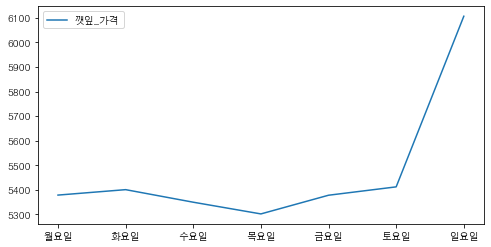

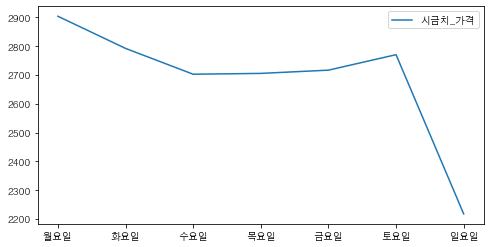

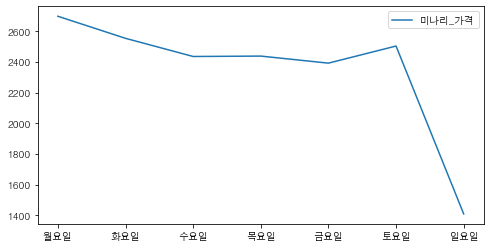

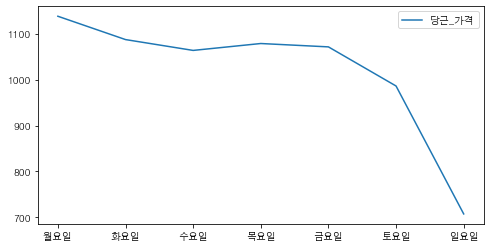

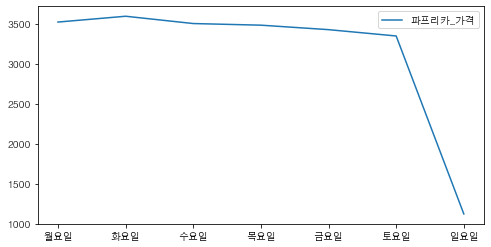

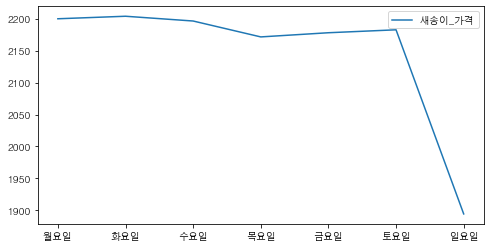

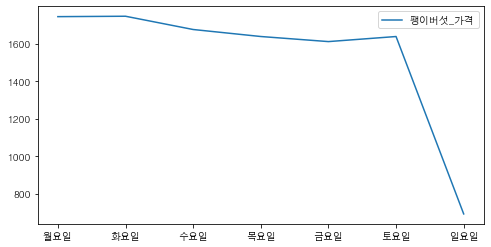

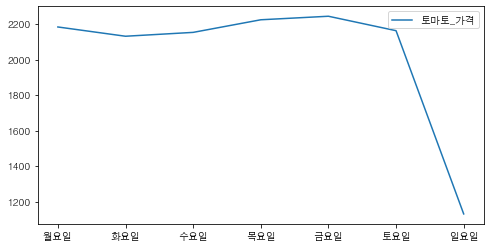

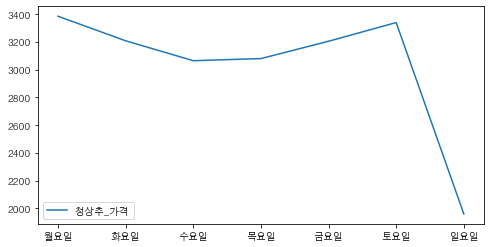

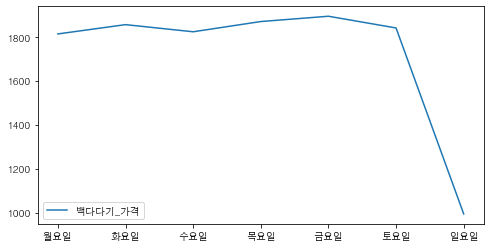

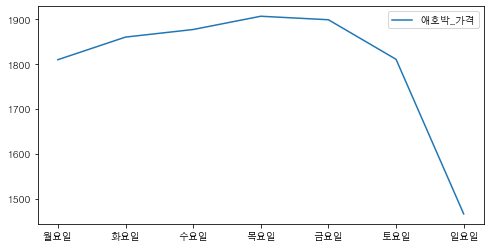

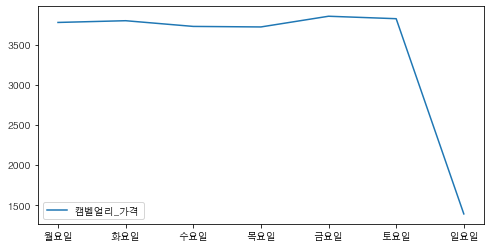

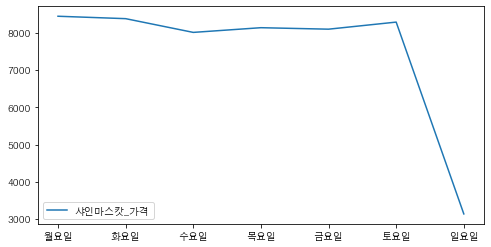

In [308]:
for i in  range(len(prc_day.columns)-1):
    plt.figure(figsize = (8,4))
    plt.plot(prc_day['요일'], prc_day.iloc[:,i+1], label = prc_day.columns[i+1])
    plt.legend()
    plt.show()

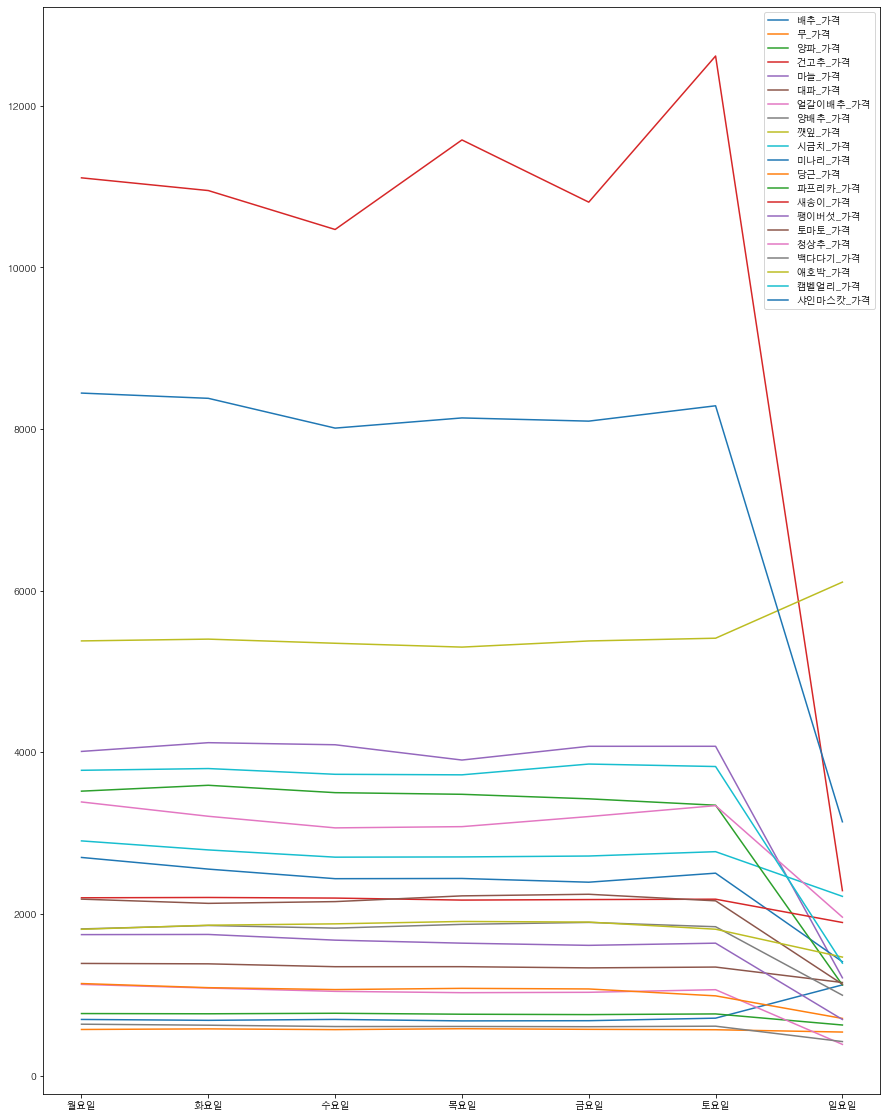

In [311]:
plt.figure(figsize = (15,20))

for i in  range(len(prc_day.columns)-1):
    plt.plot(prc_day['요일'], prc_day.iloc[:,[i+1]] , label = prc_day.columns[i+1])
    plt.legend()

### 계절/ 주중주말 요인

In [313]:
# 계절

def get_season(x):
    season = ''
    if (x == 1) or (x == 2) or (x == 12):
        season = 'winter'
    elif (x == 3) or (x == 4) or (x == 5):
        season = 'spring'
    elif (x == 6) or (x == 7) or (x == 8):
        season = 'summer'
    elif (x == 9) or (x == 10) or (x == 11):
        season = 'fall'
    else:
        season = ''
    return season

In [316]:
# 계절

def get_week(x):
    week = ''
    if (x == '월요일') or (x == '화요일') or (x == '수요일') or ( x == '목요일') or ( x == '금요일') :
        week = '주중'
    elif (x == '토요일') or (x == '일요일') :
        week = '주말'
    else:
        week = ''
    return week

In [317]:
train['season'] = train['month'].apply(lambda x: get_season(x)).astype('category')
train['week'] = train['요일'].apply(lambda x : get_week(x)).astype('category')
train

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


year  month  date   요일     배추_거래량   배추_가격      무_거래량    무_가격     양파_거래량  \
0     2016      1     1  금요일        0.0     0.0        0.0     0.0        0.0   
1     2016      1     2  토요일    80860.0   329.0    80272.0   360.0   122787.5   
2     2016      1     3  일요일        0.0     0.0        0.0     0.0        0.0   
3     2016      1     4  월요일  1422742.5   478.0  1699653.7   382.0  2315079.0   
4     2016      1     5  화요일  1167241.0   442.0  1423482.3   422.0  2092960.1   
...    ...    ...   ...  ...        ...     ...        ...     ...        ...   
1728  2020      9    24  목요일  1856965.0  1839.0  2055640.0   990.0  2281429.2   
1729  2020      9    25  금요일  1880095.5  1789.0  1879261.0  1011.0  2074513.0   
1730  2020      9    26  토요일  1661090.9  1760.0  1709385.7  1075.0  2089081.2   
1731  2020      9    27  일요일    25396.0  3066.0    38222.0  1139.0    18240.0   
1732  2020      9    28  월요일  2405051.9  1867.0  2747519.5  1147.0  2235784.7   

       양파_가격  건고추_거래량   건고추_가격    마늘_거래량   마늘_가격    대파_거래량   대파_가격  얼갈이배추_거래량  \
0        0.0      0.0      0.0       0.0     0.0       0.0     0.0        0.0   
1     1281.0      3.0  11000.0   15019.0  5475.0   92334.0  1704.0     6359.0   
2        0.0      0.0      0.0       0.0     0.0       0.0     0.0        0.0   
3     1235.0    699.0   4464.0  141638.0  5210.0  994328.1  1716.0   262615.5   
4     1213.0   1112.6   4342.0  126207.8  5387.0  787716.0  1715.0   221850.5   
...      ...      ...      ...       ...     ...       ...     ...        ...   
1728   990.0   2818.4  19101.0  134359.9  4775.0  770271.0  2380.0   440799.7   
1729   955.0   1887.1  23095.0  126926.0  5039.0  781384.8  2239.0   424009.4   
1730   961.0    959.0  22510.0  110357.7  5565.0  810812.8  2126.0   414436.4   
1731  1056.0     60.0  22333.0     620.0  5227.0   18291.4  1866.0     4022.0   
1732   964.0   1630.6  22022.0  175584.1  4757.0  972402.9  2614.0   532361.5   

      얼갈이배추_가격    양배추_거래량  양배추_가격    깻잎_거래량    깻잎_가격   시금치_거래량  시금치_가격  \
0          0.0        0.0     0.0       0.0      0.0       0.0     0.0   
1       1331.0    40028.0   348.0    4374.9  13242.0   16550.5  2339.0   
2          0.0        0.0     0.0       0.0      0.0       0.0     0.0   
3       1212.0  1074699.1   345.0  122613.5   9923.0  427435.1  2153.0   
4       1197.0   825681.9   350.0   79055.9   9529.0  334636.8  2220.0   
...        ...        ...     ...       ...      ...       ...     ...   
1728    1868.0   656500.5  1143.0   79508.0  10028.0   69843.5  6329.0   
1729    2047.0   716803.2  1090.0   84842.0  10921.0   89315.4  6262.0   
1730    2095.0   502673.3  1326.0   99449.0  10607.0  124259.5  7123.0   
1731     798.0    16573.0   998.0    2159.8  12195.0    1091.0  7178.0   
1732    2349.0   732005.3  1423.0  156779.7  11164.0  293159.8  8145.0   

       미나리_거래량  미나리_가격    당근_거래량   당근_가격  파프리카_거래량  파프리카_가격   새송이_거래량  새송이_가격  \
0          0.0     0.0       0.0     0.0       0.0      0.0       0.0     0.0   
1      10528.0  1729.0   13885.0   804.0    3853.0   3703.0   15797.0  2576.0   
2          0.0     0.0       0.0     0.0       0.0      0.0       0.0     0.0   
3      82113.5  3960.0  558950.2   794.0  104930.3   4871.0  277326.5  2440.0   
4      80144.0  3333.0  444353.7   763.0  100699.5   5129.0  218465.2  2437.0   
...        ...     ...       ...     ...       ...      ...       ...     ...   
1728   60020.8  4950.0  423233.2  1565.0   94152.5   9206.0  200810.1  2927.0   
1729  124693.1  2595.0  400527.2  1773.0   87127.3   9084.0  222932.0  2994.0   
1730   75850.1  4310.0  187076.2  1405.0  102672.0   9198.0  249009.1  2942.0   
1731     676.0  1869.0      60.0  3750.0       0.0      0.0    4766.0  2946.0   
1732   96162.5  7196.0  422012.6  2001.0  183983.8   9393.0  315101.7  3360.0   

      팽이버섯_거래량  팽이버섯_가격   토마토_거래량  토마토_가격  청상추_거래량  청상추_가격  백다다기_거래량  백다다기_가격  \
0          0.0      0.0       0.0     0.0      0.0     0.0       0.0      0.0   
1      14634.0   1474.0   30950.0  1

#### 시간별 계절 평균

In [331]:
# 행이 전체 다 0 인거 제외 하기

train['총합'] = train.iloc[:,4:46].sum(axis =1)
train = train.drop(train[['year','month','date','요일','총합']][train.총합 == 0].index)

c:\users\userk\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [339]:
train

year  month  date   요일     배추_거래량   배추_가격      무_거래량    무_가격     양파_거래량  \
1     2016      1     2  토요일    80860.0   329.0    80272.0   360.0   122787.5   
3     2016      1     4  월요일  1422742.5   478.0  1699653.7   382.0  2315079.0   
4     2016      1     5  화요일  1167241.0   442.0  1423482.3   422.0  2092960.1   
5     2016      1     6  수요일  1045507.5   442.0  1904372.1   409.0  1860569.0   
6     2016      1     7  목요일  1039925.0   448.0  1438990.2   428.0  1868011.7   
...    ...    ...   ...  ...        ...     ...        ...     ...        ...   
1728  2020      9    24  목요일  1856965.0  1839.0  2055640.0   990.0  2281429.2   
1729  2020      9    25  금요일  1880095.5  1789.0  1879261.0  1011.0  2074513.0   
1730  2020      9    26  토요일  1661090.9  1760.0  1709385.7  1075.0  2089081.2   
1731  2020      9    27  일요일    25396.0  3066.0    38222.0  1139.0    18240.0   
1732  2020      9    28  월요일  2405051.9  1867.0  2747519.5  1147.0  2235784.7   

       양파_가격  건고추_거래량   건고추_가격    마늘_거래량   마늘_가격    대파_거래량   대파_가격  얼갈이배추_거래량  \
1     1281.0      3.0  11000.0   15019.0  5475.0   92334.0  1704.0     6359.0   
3     1235.0    699.0   4464.0  141638.0  5210.0  994328.1  1716.0   262615.5   
4     1213.0   1112.6   4342.0  126207.8  5387.0  787716.0  1715.0   221850.5   
5     1263.0   1672.0   7041.0   91531.0  5013.0  793584.9  1620.0   199151.0   
6     1241.0   1191.0   3908.0  349913.8  4360.0  733312.0  1545.0   200119.0   
...      ...      ...      ...       ...     ...       ...     ...        ...   
1728   990.0   2818.4  19101.0  134359.9  4775.0  770271.0  2380.0   440799.7   
1729   955.0   1887.1  23095.0  126926.0  5039.0  781384.8  2239.0   424009.4   
1730   961.0    959.0  22510.0  110357.7  5565.0  810812.8  2126.0   414436.4   
1731  1056.0     60.0  22333.0     620.0  5227.0   18291.4  1866.0     4022.0   
1732   964.0   1630.6  22022.0  175584.1  4757.0  972402.9  2614.0   532361.5   

      얼갈이배추_가격    양배추_거래량  양배추_가격    깻잎_거래량    깻잎_가격   시금치_거래량  시금치_가격  \
1       1331.0    40028.0   348.0    4374.9  13242.0   16550.5  2339.0   
3       1212.0  1074699.1   345.0  122613.5   9923.0  427435.1  2153.0   
4       1197.0   825681.9   350.0   79055.9   9529.0  334636.8  2220.0   
5       1142.0   910812.3   327.0   78532.8   8123.0  357749.8  2219.0   
6        992.0   836339.0   315.0   75987.7   6793.0  323944.6  2208.0   
...        ...        ...     ...       ...      ...       ...     ...   
1728    1868.0   656500.5  1143.0   79508.0  10028.0   69843.5  6329.0   
1729    2047.0   716803.2  1090.0   84842.0  10921.0   89315.4  6262.0   
1730    2095.0   502673.3  1326.0   99449.0  10607.0  124259.5  7123.0   
1731     798.0    16573.0   998.0    2159.8  12195.0    1091.0  7178.0   
1732    2349.0   732005.3  1423.0  156779.7  11164.0  293159.8  8145.0   

       미나리_거래량  미나리_가격    당근_거래량   당근_가격  파프리카_거래량  파프리카_가격   새송이_거래량  새송이_가격  \
1      10528.0  1729.0   13885.0   804.0    3853.0   3703.0   15797.0  2576.0   
3      82113.5  3960.0  558950.2   794.0  104930.3   4871.0  277326.5  2440.0   
4      80144.0  3333.0  444353.7   763.0  100699.5   5129.0  218465.2  2437.0   
5      76832.6  3133.0  396170.4   787.0   93051.3   5120.0  187900.4  2343.0   
6      49040.9  2259.0  241115.0   770.0   60895.4   5095.0  181058.6  2291.0   
...        ...     ...       ...     ...       ...      ...       ...     ...   
1728   60020.8  4950.0  423233.2  1565.0   94152.5   9206.0  200810.1  2927.0   
1729  124693.1  2595.0  400527.2  1773.0   87127.3   9084.0  222932.0  2994.0   
1730   75850.1  4310.0  187076.2  1405.0  102672.0   9198.0  249009.1  2942.0   
1731     676.0  1869.0      60.0  3750.0       0.0      0.0    4766.0  2946.0   
1732   96162.5  7196.0  422012.6  2001.0  183983.8   9393.0  315101.7  3360.0   

      팽이버섯_거래량  팽이버섯_가격   토마토_거래량  토마토_가격  청상추_거래량  청상추_가격  백다다기_거래량  백다다기_가격  \
1      14634.0   1474.0   30950.0  1621.0   5125.0  9235.0     434.0   2109.0   
3     159800.0   1750.0  291057.0  1

In [347]:
df = train.groupby(['year','season','week'])[['배추_거래량', '배추_가격', '무_거래량', '무_가격',
       '양파_거래량', '양파_가격', '건고추_거래량', '건고추_가격', '마늘_거래량', '마늘_가격', '대파_거래량',
       '대파_가격', '얼갈이배추_거래량', '얼갈이배추_가격', '양배추_거래량', '양배추_가격', '깻잎_거래량',
       '깻잎_가격', '시금치_거래량', '시금치_가격', '미나리_거래량', '미나리_가격', '당근_거래량', '당근_가격',
       '파프리카_거래량', '파프리카_가격', '새송이_거래량', '새송이_가격', '팽이버섯_거래량', '팽이버섯_가격',
       '토마토_거래량', '토마토_가격', '청상추_거래량', '청상추_가격', '백다다기_거래량', '백다다기_가격',
       '애호박_거래량', '애호박_가격', '캠벨얼리_거래량', '캠벨얼리_가격', '샤인마스캇_거래량', '샤인마스캇_가격']].mean().reset_index()

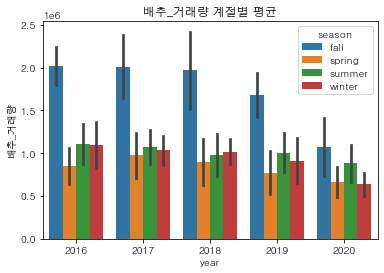

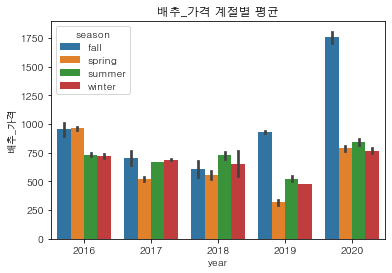

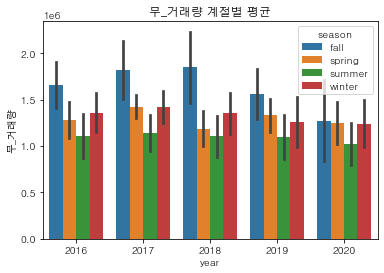

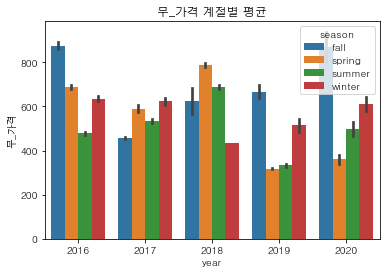

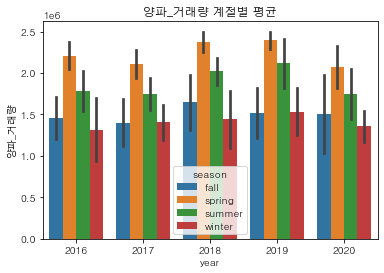

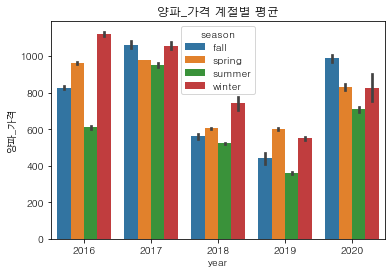

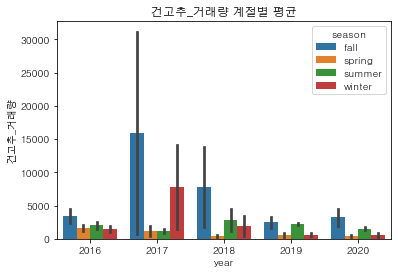

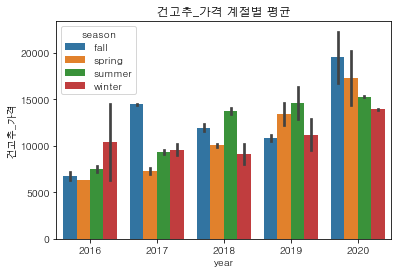

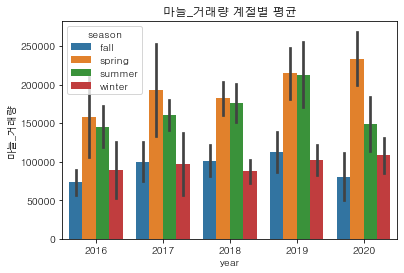

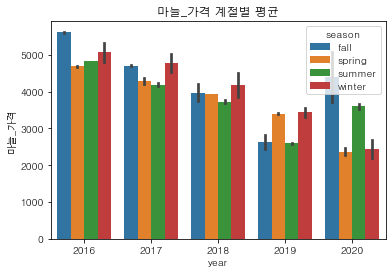

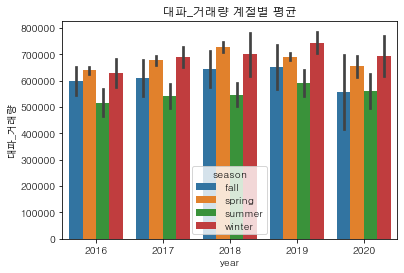

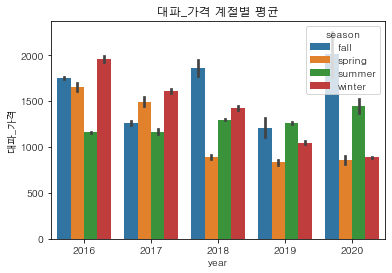

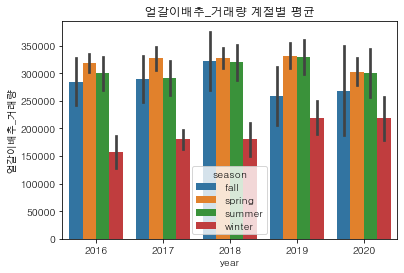

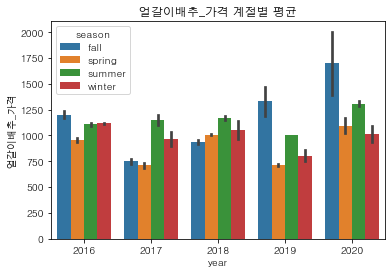

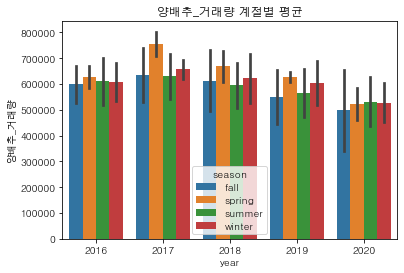

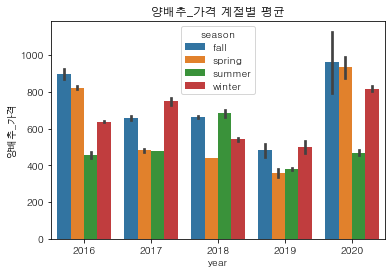

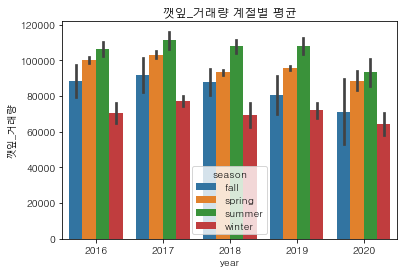

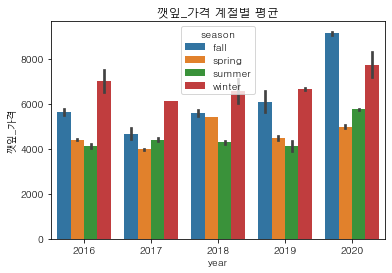

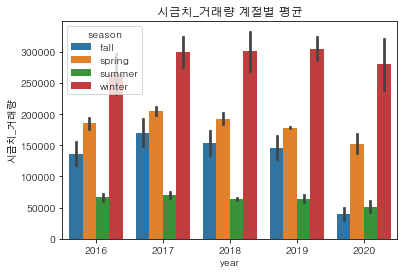

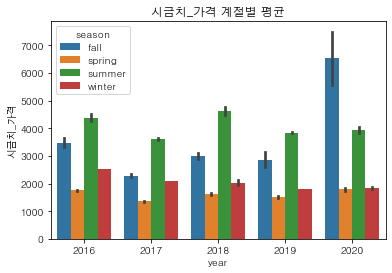

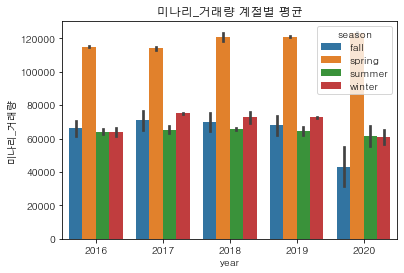

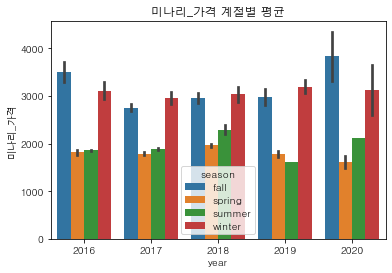

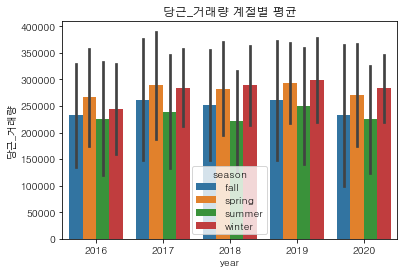

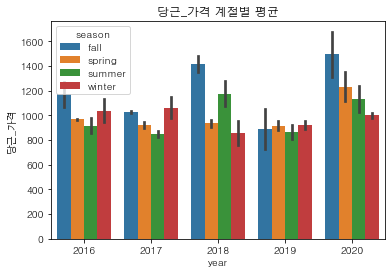

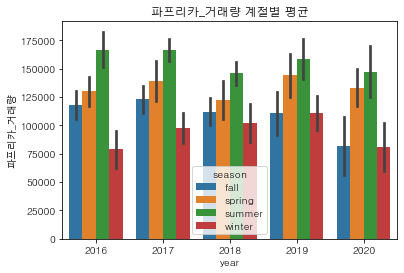

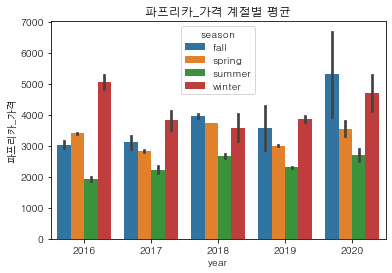

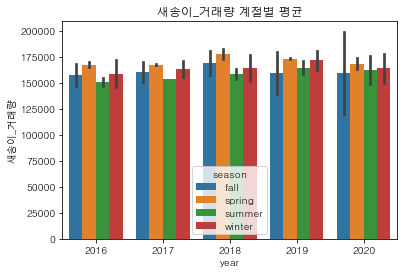

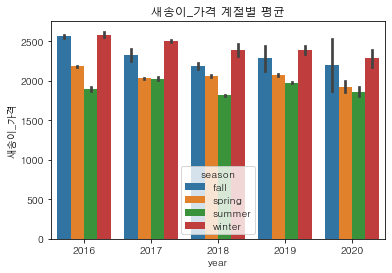

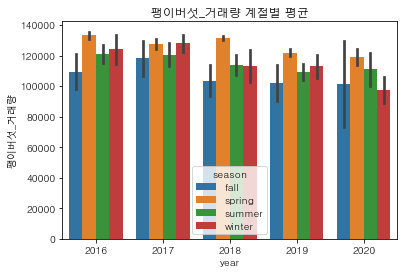

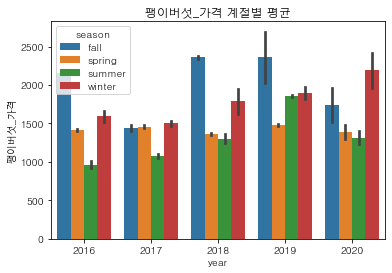

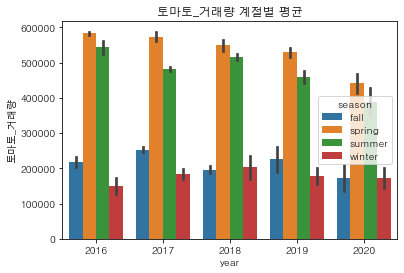

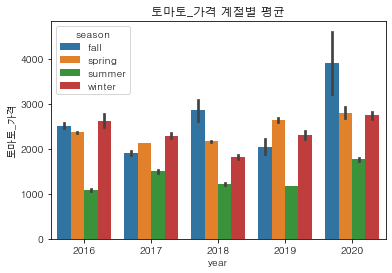

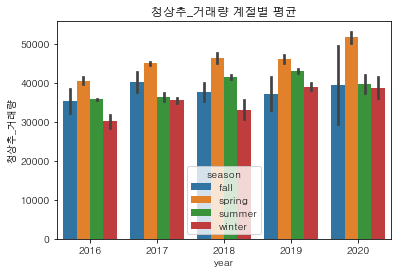

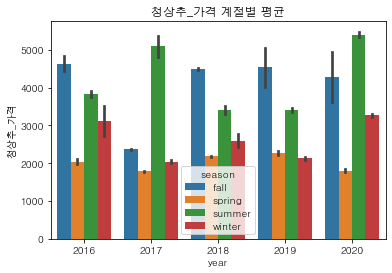

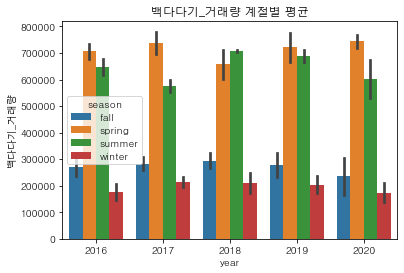

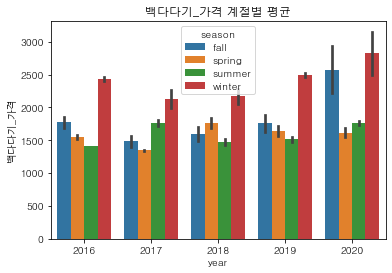

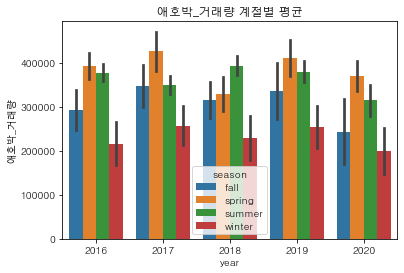

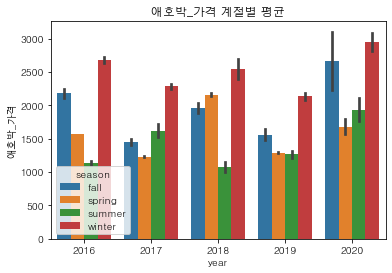

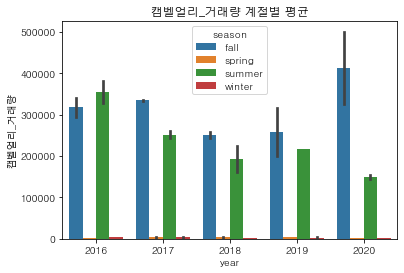

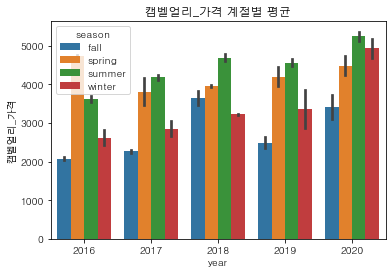

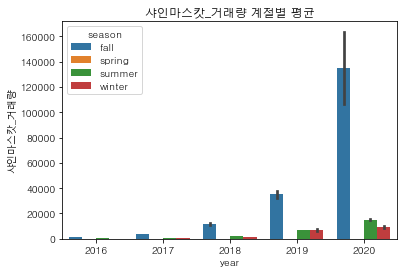

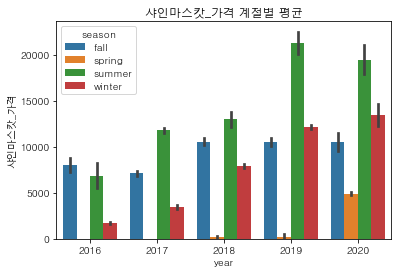

In [358]:
for i in range(len(df.columns)-3):
    sns.barplot(data = df , x = 'year', y = df.columns[i+3] , hue = 'season')
    plt.title('{} 계절별 평균'.format(df.columns[i+3]))
    plt.show()

#### 시간별 주중/주말 평균

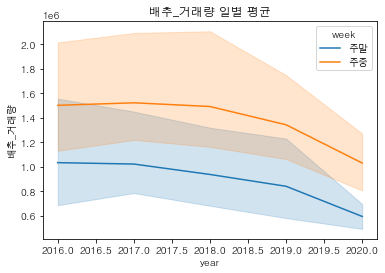

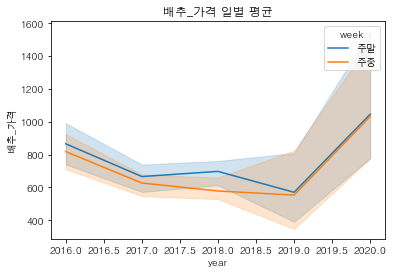

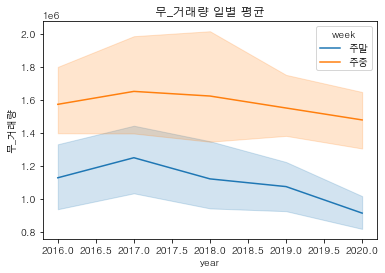

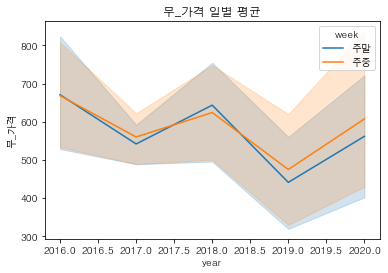

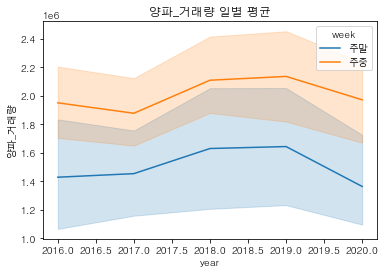

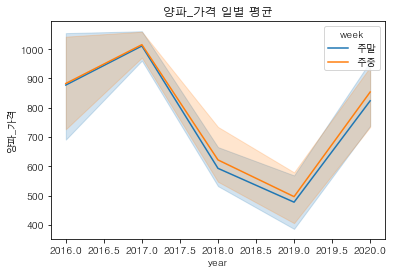

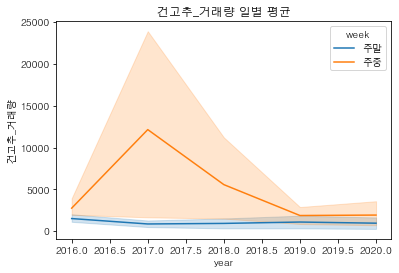

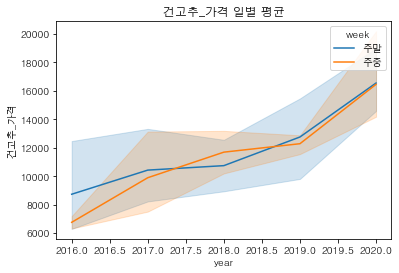

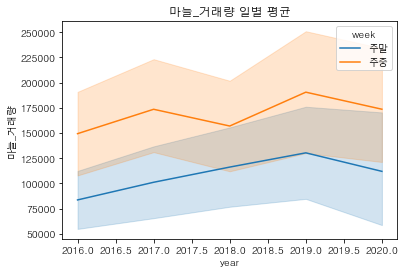

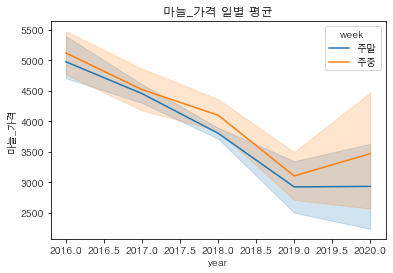

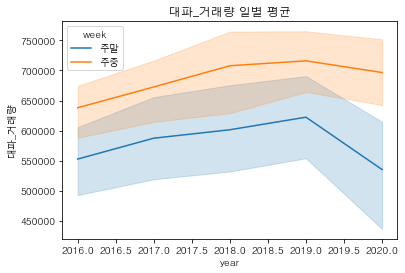

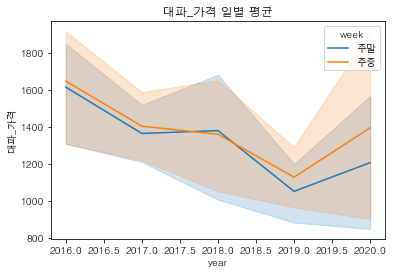

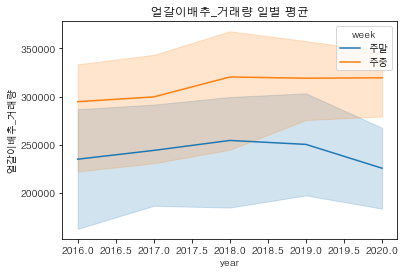

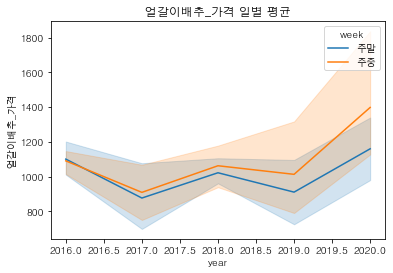

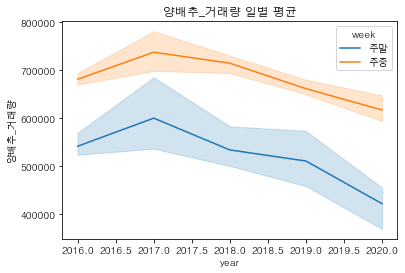

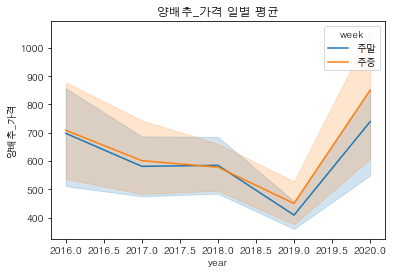

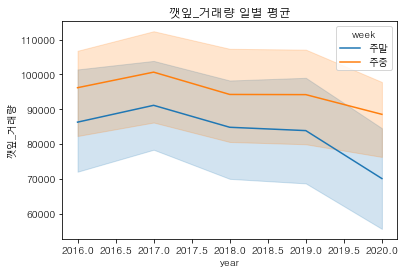

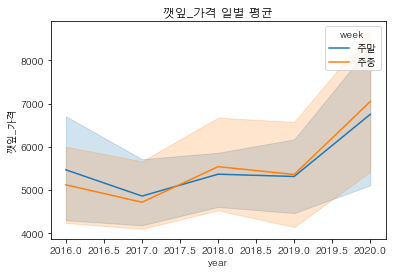

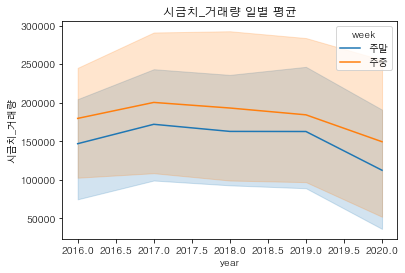

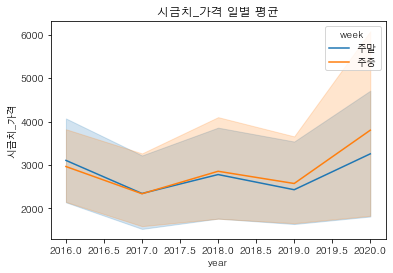

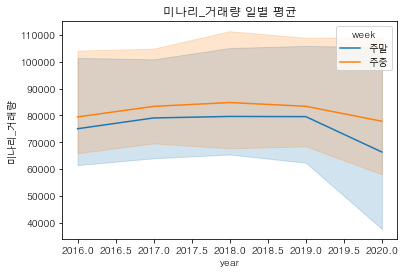

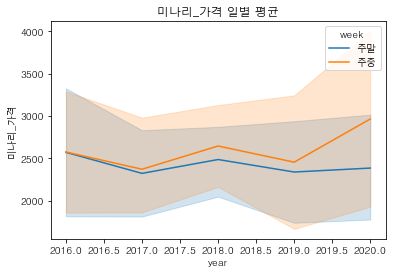

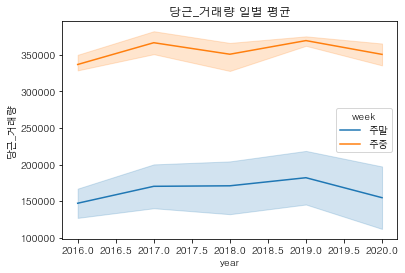

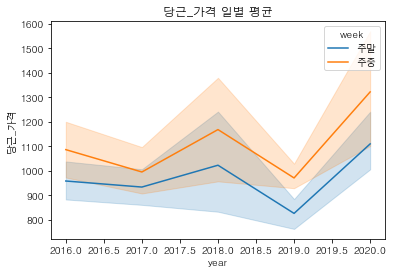

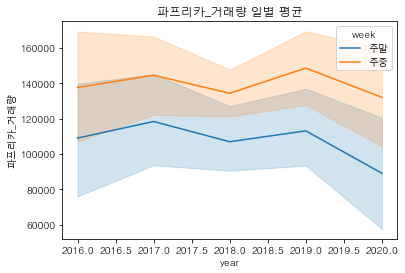

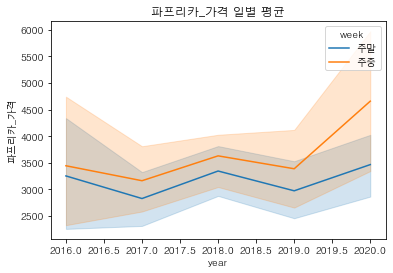

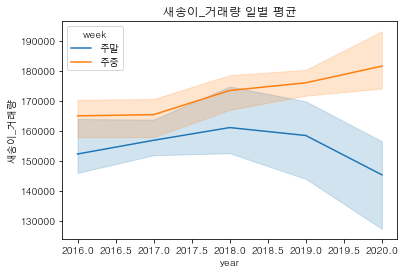

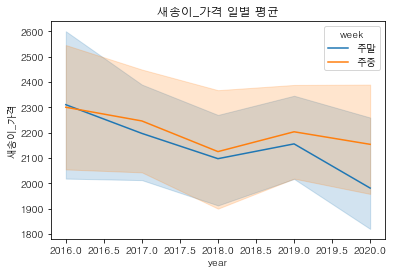

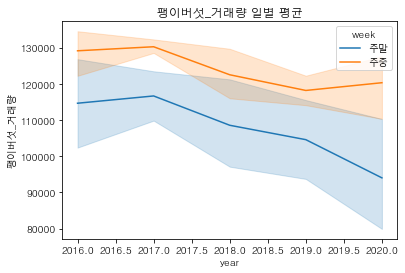

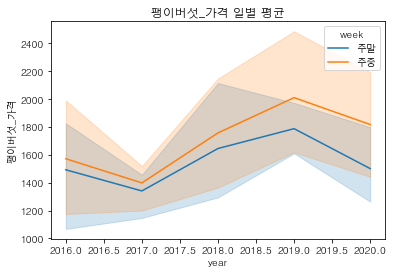

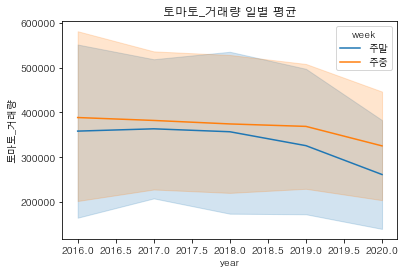

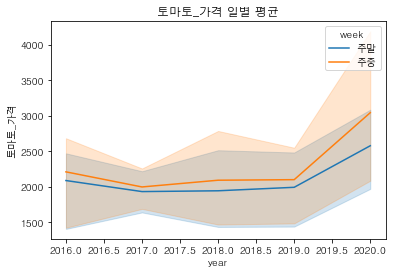

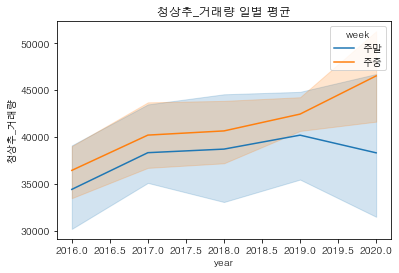

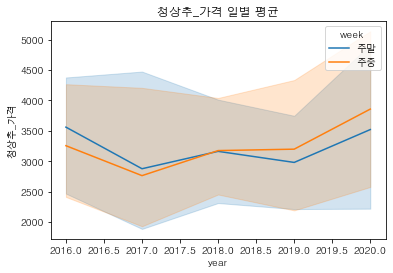

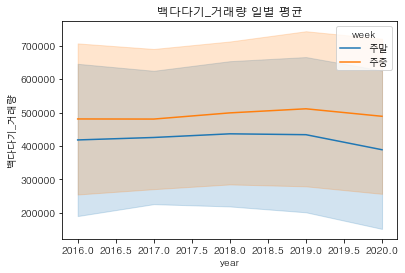

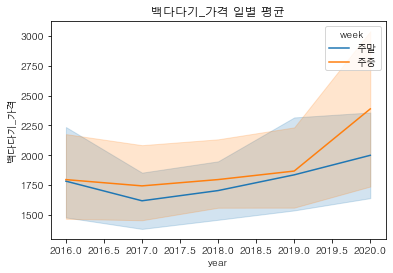

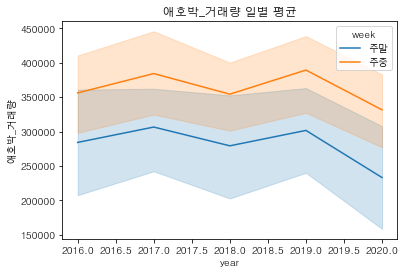

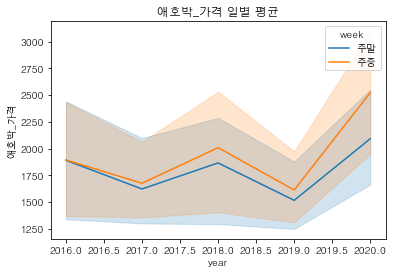

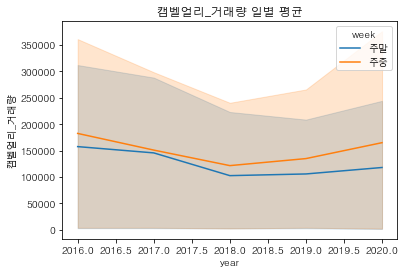

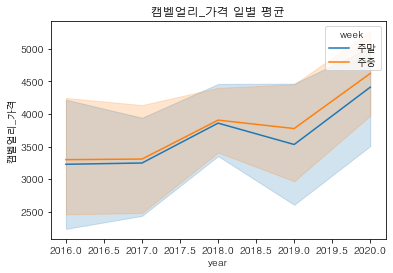

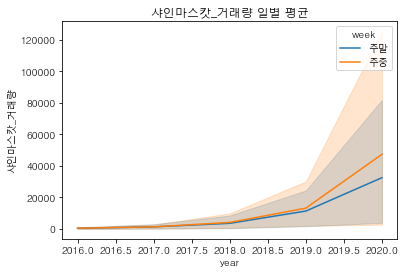

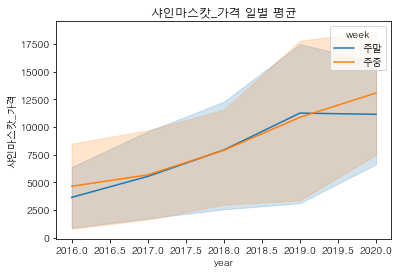

In [360]:
for i in range(len(df.columns)-3):
    sns.lineplot(data = df , x = 'year', y = df.columns[i+3] , hue = 'week')
    plt.title('{} 일별 평균'.format(df.columns[i+3]))
    plt.show()

###  train 추가 정보

- train_AT_TSALET_ALL 파일에 왜 아무것도 없냐..? 

In [363]:
train

year  month  date   요일     배추_거래량   배추_가격      무_거래량    무_가격     양파_거래량  \
1     2016      1     2  토요일    80860.0   329.0    80272.0   360.0   122787.5   
3     2016      1     4  월요일  1422742.5   478.0  1699653.7   382.0  2315079.0   
4     2016      1     5  화요일  1167241.0   442.0  1423482.3   422.0  2092960.1   
5     2016      1     6  수요일  1045507.5   442.0  1904372.1   409.0  1860569.0   
6     2016      1     7  목요일  1039925.0   448.0  1438990.2   428.0  1868011.7   
...    ...    ...   ...  ...        ...     ...        ...     ...        ...   
1728  2020      9    24  목요일  1856965.0  1839.0  2055640.0   990.0  2281429.2   
1729  2020      9    25  금요일  1880095.5  1789.0  1879261.0  1011.0  2074513.0   
1730  2020      9    26  토요일  1661090.9  1760.0  1709385.7  1075.0  2089081.2   
1731  2020      9    27  일요일    25396.0  3066.0    38222.0  1139.0    18240.0   
1732  2020      9    28  월요일  2405051.9  1867.0  2747519.5  1147.0  2235784.7   

       양파_가격  건고추_거래량   건고추_가격    마늘_거래량   마늘_가격    대파_거래량   대파_가격  얼갈이배추_거래량  \
1     1281.0      3.0  11000.0   15019.0  5475.0   92334.0  1704.0     6359.0   
3     1235.0    699.0   4464.0  141638.0  5210.0  994328.1  1716.0   262615.5   
4     1213.0   1112.6   4342.0  126207.8  5387.0  787716.0  1715.0   221850.5   
5     1263.0   1672.0   7041.0   91531.0  5013.0  793584.9  1620.0   199151.0   
6     1241.0   1191.0   3908.0  349913.8  4360.0  733312.0  1545.0   200119.0   
...      ...      ...      ...       ...     ...       ...     ...        ...   
1728   990.0   2818.4  19101.0  134359.9  4775.0  770271.0  2380.0   440799.7   
1729   955.0   1887.1  23095.0  126926.0  5039.0  781384.8  2239.0   424009.4   
1730   961.0    959.0  22510.0  110357.7  5565.0  810812.8  2126.0   414436.4   
1731  1056.0     60.0  22333.0     620.0  5227.0   18291.4  1866.0     4022.0   
1732   964.0   1630.6  22022.0  175584.1  4757.0  972402.9  2614.0   532361.5   

      얼갈이배추_가격    양배추_거래량  양배추_가격    깻잎_거래량    깻잎_가격   시금치_거래량  시금치_가격  \
1       1331.0    40028.0   348.0    4374.9  13242.0   16550.5  2339.0   
3       1212.0  1074699.1   345.0  122613.5   9923.0  427435.1  2153.0   
4       1197.0   825681.9   350.0   79055.9   9529.0  334636.8  2220.0   
5       1142.0   910812.3   327.0   78532.8   8123.0  357749.8  2219.0   
6        992.0   836339.0   315.0   75987.7   6793.0  323944.6  2208.0   
...        ...        ...     ...       ...      ...       ...     ...   
1728    1868.0   656500.5  1143.0   79508.0  10028.0   69843.5  6329.0   
1729    2047.0   716803.2  1090.0   84842.0  10921.0   89315.4  6262.0   
1730    2095.0   502673.3  1326.0   99449.0  10607.0  124259.5  7123.0   
1731     798.0    16573.0   998.0    2159.8  12195.0    1091.0  7178.0   
1732    2349.0   732005.3  1423.0  156779.7  11164.0  293159.8  8145.0   

       미나리_거래량  미나리_가격    당근_거래량   당근_가격  파프리카_거래량  파프리카_가격   새송이_거래량  새송이_가격  \
1      10528.0  1729.0   13885.0   804.0    3853.0   3703.0   15797.0  2576.0   
3      82113.5  3960.0  558950.2   794.0  104930.3   4871.0  277326.5  2440.0   
4      80144.0  3333.0  444353.7   763.0  100699.5   5129.0  218465.2  2437.0   
5      76832.6  3133.0  396170.4   787.0   93051.3   5120.0  187900.4  2343.0   
6      49040.9  2259.0  241115.0   770.0   60895.4   5095.0  181058.6  2291.0   
...        ...     ...       ...     ...       ...      ...       ...     ...   
1728   60020.8  4950.0  423233.2  1565.0   94152.5   9206.0  200810.1  2927.0   
1729  124693.1  2595.0  400527.2  1773.0   87127.3   9084.0  222932.0  2994.0   
1730   75850.1  4310.0  187076.2  1405.0  102672.0   9198.0  249009.1  2942.0   
1731     676.0  1869.0      60.0  3750.0       0.0      0.0    4766.0  2946.0   
1732   96162.5  7196.0  422012.6  2001.0  183983.8   9393.0  315101.7  3360.0   

      팽이버섯_거래량  팽이버섯_가격   토마토_거래량  토마토_가격  청상추_거래량  청상추_가격  백다다기_거래량  백다다기_가격  \
1      14634.0   1474.0   30950.0  1621.0   5125.0  9235.0     434.0   2109.0   
3     159800.0   1750.0  291057.0  1